# Final Project: Global Football Data Analysis

This is the final project for the course **"Programming for Data Science"** at the **Faculty of Information Technology**, **University of Science, Vietnam National University, Ho Chi Minh City**.

---

**Instructor:** Phạm Trọng Nghĩa  

**Course:** Programming for Data Science  

**Date:** 12/2024

---

## Project Overview

- Với độ phủ sóng toàn cầu, bóng đá từ lâu đã được coi là môn thể thao vua và được ví như một ngôn ngữ chung để kết nối hàng triệu con người. Trải qua lịch sử hàng trăm năm hình thành và phát triển, môn thể thao vua không chỉ là sân chơi của các cầu thủ tài năng mà còn là biểu tượng của niềm đam mê, sự đoàn kết và những khoảnh khắc không thể nào quên.
- Là những người yêu thích bóng đá, nhóm chúng em đã tìm đến bộ dữ liệu **"Kết quả bóng đá quốc tế từ 1872 đến 2024"** với mong muốn khám phá và phân tích bức tranh toàn cảnh về bóng đá nam toàn cầu.
- Mục tiêu của đồ án không chỉ dừng lại ở việc phân tích các xu hướng và yếu tố ảnh hưởng đến kết quả của các đội tuyển quốc gia mà còn mở rộng sang việc dự đoán những xu hướng mới.
- Thông qua việc áp dụng các phương pháp trong quy trình khoa học dữ liệu, đồ án hy vọng sẽ đạt được mục tiêu và đóng góp một góc nhìn thú vị, hữu ích cho cộng đồng yêu bóng đá.

---

## GitHub Repository

Truy cập toàn bộ dự án trên GitHub:

- [Global Football Data Analysis Repository](https://github.com/trgtanhh04/Programming4DS_Final)

---

## Import

In [1]:
import numpy as np
import pandas as pd
from typing import List
import seaborn as sns
import matplotlib.pyplot as plt

---

## Data collecting

### What is the subject of your data?

- Như đã đề cập ở phần Tổng quan, trong đồ án này chúng em sử dụng bộ dữ liệu **"Kết quả bóng đá quốc tế từ 1872 đến 2024"**.
- Bộ dữ liệu này bao gồm gần 48.000 kết quả của các trận đấu bóng đá quốc tế bắt đầu từ trận đấu chính thức đầu tiên vào năm 1872 cho đến năm 2024. Các trận đấu trải dài từ FIFA World Cup đến FIFI Wild Cup cho đến các trận giao hữu thông thường.
- Các trận đấu này hoàn toàn là trận đấu quốc tế dành cho nam, không bao gồm Thế vận hội hoặc các trận đấu mà ít nhất một trong các đội là đội B, U-23 hoặc đội tuyển chọn của giải đấu.

### What is the source of your data?

Dữ liệu được lấy từ Kaggle, có tại:

- [International Football Results Dataset](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?select=shootouts.csv)


### Do the authors of this data allow you to use it like this?

Tác giả của dữ liệu này cho phép sử dụng theo **Giấy phép dữ liệu mở** (hoặc các giấy phép cụ thể khác tùy thuộc vào nguồn dữ liệu). Có thể kiểm tra giấy phép dữ liệu tại liên kết sau:

- [Data License from Kaggle](https://creativecommons.org/publicdomain/zero/1.0/)

### How did the authors collect the data?

- Dữ liệu được tác giả thu thập từ nhiều nguồn, bao gồm Wikipedia, rsssf.com và các trang web của từng hiệp hội bóng đá.
- Tác giả đã tổ chức dữ liệu thu thập được thành 3 bộ dữ liệu: `results.csv`, `goalscorers.csv` và `shootouts.csv`.

---

## Exploring data + preprocessing data

### Read raw data from file

In [2]:
raw_goal_scorers = pd.read_csv("Data/goalscorers.csv")
raw_results = pd.read_csv("Data/results.csv")
raw_shootouts = pd.read_csv("Data/shootouts.csv")

In [3]:
raw_goal_scorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [4]:
raw_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
raw_shootouts.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


### How many rows and how many columns?

Chúng ta sẽ tính toán số hàng và cột của 3 DataFrames `raw_goal_scorers`, `raw_results` và `raw_shootouts`. Sau đó, lưu trữ nó trong biến `shape_goal_scorers`, `shape_results` và `shape_shootouts`

In [6]:
shape_goal_scorers = raw_goal_scorers.shape
shape_results = raw_results.shape
shape_shootouts = raw_shootouts.shape

In [7]:
print(f"Goal scorers shape: {shape_goal_scorers}")
print(f"Results shape: {shape_results}")
print(f"Shootouts shape: {shape_shootouts}")

Goal scorers shape: (44362, 8)
Results shape: (47917, 9)
Shootouts shape: (645, 5)


### What does each line mean? Does it matter if the lines have different meanings?

- Tất cả các dòng trong các file CSV này đều mô tả các trận đấu bóng đá từ các khía cạnh khác nhau: bàn thắng ghi được, kết quả trận đấu và các trận đấu có loạt sút penalty. Mỗi dòng cung cấp các thông tin chi tiết giúp ta phân tích và theo dõi các trận đấu, cầu thủ ghi bàn, tỉ số, và những chi tiết đặc biệt như sút penalty.
- Việc các dòng trong mỗi file phải có ý nghĩa và cấu trúc nhất quán theo từng cột là rất quan trọng. Điều này đảm bảo tính toàn vẹn của dữ liệu, tránh các lỗi phân tích và cho phép xử lý dữ liệu một cách suôn sẻ. Nếu dữ liệu trong một file bị trộn lẫn giữa các loại thông tin khác nhau, nó sẽ làm mất đi mục đích của dữ liệu và dẫn đến các kết luận sai lệch hoặc phân tích không chính xác.

### Notes:

Một số lưu ý quan trọng từ tác giả:
- Đối với đội chủ nhà `(home_team)` và đội khách `(away_team)`, tên hiện tại của đội sẽ được sử dụng. Ví dụ, vào năm 1882, khi một đội tự gọi mình là Ireland thi đấu với Anh, trong tập dữ liệu này, đội đó được gọi là Bắc Ireland vì đội Bắc Ireland hiện tại là đội kế thừa của đội Ireland năm 1882. Việc này được thực hiện để dễ theo dõi lịch sử và số liệu thống kê của các đội hơn.
- Đối với tên quốc gia `(country)`, tên quốc gia tại thời điểm diễn ra trận đấu sẽ được sử dụng. Vì vậy, khi Ghana chơi ở Accra, Gold Coast vào những năm 1950, mặc dù tên của đội chủ nhà và quốc gia không trùng nhau, nhưng đó vẫn là trận đấu trên sân nhà của Ghana. Điều này được biểu thị bằng cột trung lập `(neutral)`, ghi là SAI **(FALSE)** đối với những trận đấu đó, nghĩa là trận đấu không diễn ra ở địa điểm trung lập.


### Does the raw data have duplicate rows?

Chúng ta sẽ tính toán số hàng có chỉ mục trùng lặp và lưu trữ trong biến `goal_scorers_duplicated`, `results_duplicated` và `shootouts_duplicated`.

In [8]:
goal_scorers_duplicated = len(raw_goal_scorers[raw_goal_scorers.duplicated()])
results_duplicated = len(raw_results[raw_results.duplicated()])
shootouts_duplicated = len(raw_shootouts[raw_shootouts.duplicated()])

In [9]:
def check_duplicates(file_name, duplicated_count):
    if duplicated_count == 0:
        print(f"{file_name} data have no duplicated line.!")
    else:
        ext = "lines" if duplicated_count > 1 else "line"
        print(f"{file_name} data have {duplicated_count} duplicated {ext}!")

# Kiểm tra từng file
check_duplicates("Goal scorers", goal_scorers_duplicated)
check_duplicates("Results", results_duplicated)
check_duplicates("Shootouts", shootouts_duplicated)

Goal scorers data have 82 duplicated lines!
Results data have no duplicated line.!
Shootouts data have no duplicated line.!


In [10]:
# Loại bỏ các dòng trùng lặp của Goal scores
raw_goal_scorers.drop_duplicates(keep=False, inplace=True)

### What does each column mean?

Dưới đây là các bảng mô tả dữ liệu từ ba tệp CSV: **Goal Scorers**, **Results** và **Shootouts**.

<table style="width:48%; float:left; padding-right:10px; border: 1px solid black; border-collapse: collapse;">
  <caption><strong>Goal Scorers</strong></caption>
  <tr>
    <th style="border: 1px solid black;">Column</th>
    <th style="border: 1px solid black;">Description</th>
  </tr>
  <tr>
    <td style="border: 1px solid black;">date</td>
    <td style="border: 1px solid black;">Ngày diễn ra trận đấu.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">home_team</td>
    <td style="border: 1px solid black;">Tên đội chủ nhà.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">away_team</td>
    <td style="border: 1px solid black;">Tên đội khách.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">team</td>
    <td style="border: 1px solid black;">Tên đội ghi bàn thắng.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">scorer</td>
    <td style="border: 1px solid black;">Tên của cầu thủ ghi bàn.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">minute</td>
    <td style="border: 1px solid black;">Phút ghi bàn.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">own_goal</td>
    <td style="border: 1px solid black;">Liệu bàn thắng có phải là phản lưới nhà không.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">penalty</td>
    <td style="border: 1px solid black;">Liệu bàn thắng có phải là quả phạt đền không.</td>
  </tr>
</table>

<table style="width:48%; float:left; border: 1px solid black; border-collapse: collapse;">
  <caption><strong>Results</strong></caption>
  <tr>
    <th style="border: 1px solid black;">Column</th>
    <th style="border: 1px solid black;">Description</th>
  </tr>
  <tr>
    <td style="border: 1px solid black;">date</td>
    <td style="border: 1px solid black;">Ngày diễn ra trận đấu.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">home_team</td>
    <td style="border: 1px solid black;">Tên đội chủ nhà.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">away_team</td>
    <td style="border: 1px solid black;">Tên đội khách.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">home_score</td>
    <td style="border: 1px solid black;">Tỷ số toàn trận của đội chủ nhà bao gồm cả hiệp phụ, không bao gồm loạt sút penalty.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">away_score</td>
    <td style="border: 1px solid black;">Tỷ số toàn trận của đội khách bao gồm cả hiệp phụ, không bao gồm loạt sút penalty.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">tournament</td>
    <td style="border: 1px solid black;">Tên giải đấu.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">city</td>
    <td style="border: 1px solid black;">Thành phố nơi diễn ra trận đấu.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">country</td>
    <td style="border: 1px solid black;">Quốc gia nơi diễn ra trận đấu.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">neutral</td>
    <td style="border: 1px solid black;">Cột True/False cho biết trận đấu có diễn ra tại sân trung lập (không phải sân nhà của đội nào) hay không.</td>
  </tr>
</table>

<br style="clear: both;">

<table style="width:48%; float:left; padding-right:10px; border: 1px solid black; border-collapse: collapse;">
  <caption><strong>Shootouts</strong></caption>
  <tr>
    <th style="border: 1px solid black;">Column</th>
    <th style="border: 1px solid black;">Description</th>
  </tr>
  <tr>
    <td style="border: 1px solid black;">date</td>
    <td style="border: 1px solid black;">Ngày diễn ra trận đấu.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">home_team</td>
    <td style="border: 1px solid black;">Tên đội chủ nhà.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">away_team</td>
    <td style="border: 1px solid black;">Tên đội khách.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">winner</td>
    <td style="border: 1px solid black;">Tên đội thắng cuộc trong loạt sút penalty.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">first_shooter</td>
    <td style="border: 1px solid black;">Tên đội thực hiện cú sút luân lưu đầu tiên.</td>
  </tr>
</table>


### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

Chúng ta sẽ tính toán kiểu dữ liệu (dtype) của mỗi cột trong DataFrame `raw_goal_scorers`, `raw_results`, `raw_shootouts` và lưu kết quả vào Series `dtypes_goal_scorers`, `dtypes_results`, `dtypes_shootouts` (Series này có chỉ mục là tên cột).

In [11]:
dtypes_dicts = {}

def get_dtype(raw_df):
    dtypes_dict = {}
    for column in raw_df.columns:
        dtypes_dict[column] = raw_df[column].dtype
    return dtypes_dict

# Tạo các dataframe và lưu lại dtypes vào dictionary
dtypes_dicts['goal_scorers'] = get_dtype(raw_goal_scorers)
dtypes_dicts['results'] = get_dtype(raw_results)
dtypes_dicts['shootouts'] = get_dtype(raw_shootouts)

# Chuyển các dictionary thành DataFrame
dtypes_goal_scorers = pd.DataFrame(dtypes_dicts['goal_scorers'].items(), columns=['Column Name', 'Data Type']).set_index('Column Name')
dtypes_results = pd.DataFrame(dtypes_dicts['results'].items(), columns=['Column Name', 'Data Type']).set_index('Column Name')
dtypes_shootouts = pd.DataFrame(dtypes_dicts['shootouts'].items(), columns=['Column Name', 'Data Type']).set_index('Column Name')

In [12]:
dtypes_goal_scorers

,Data Type
Column Name,
date,object
home_team,object
away_team,object
team,object
scorer,object
minute,float64
own_goal,bool
penalty,bool


In [13]:
dtypes_results

,Data Type
Column Name,
date,object
home_team,object
away_team,object
home_score,int64
away_score,int64
tournament,object
city,object
country,object
neutral,bool


In [14]:
dtypes_shootouts

,Data Type
Column Name,
date,object
home_team,object
away_team,object
winner,object
first_shooter,object


### For each column with numeric data type, how are the values distributed? 

Đối với các cột có kiểu dữ liệu số, ta sẽ tính toán:
- Percentage of missing values (tỷ lệ phần trăm (từ 0 đến 100) các giá trị bị thiếu)
- The min (giá trị nhỏ nhất)
- The lower quartile (tứ phân vị dưới)
- The median (trung vị)
- The upper quartile (tứ phân vị trên)
- The max (giá trị lớn nhất)

Vì dataframe `raw_shootouts` không có cột nào có kiểu dữ liệu số nên ta không cần làm việc với nó ở phần này.

Ta sẽ lưu kết quả vào từng DataFrame `goal_scores_num_col_info_df` và `results_num_col_info_df`, trong đó:
- Tên của các cột là tên của các cột số trong `raw_goal_scores` và `raw_results`
- Tên của các hàng: "missing_ratio", "min", 
"lower_quartile", "median", "upper_quartile", "max"

Để dễ dàng xem, bạn làm tròn tất cả các giá trị đến 1 chữ số thập phân bằng phương pháp `.round(1)`.

In [15]:
def missing_ratio(col):
    return (col.isna().mean() * 100)

def lower_quartile(col):
    return (col.quantile(0.25))

def median(col):
    return (col.median())

def upper_quartile(col):
    return (col.quantile(0.75))

**DataFrame** `raw_goal_scores`

In [16]:
goal_scores_num_col_info = raw_goal_scorers.select_dtypes(include=np.number)
goal_scores_num_col_info = goal_scores_num_col_info.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
goal_scores_num_col_info = goal_scores_num_col_info.round(1)
goal_scores_num_col_info

,minute
missing_ratio,0.3
min,1.0
lower_quartile,28.0
median,51.0
upper_quartile,73.0
max,122.0


**Nhận xét:** dữ liệu của cột `minute` rất tốt, phân bổ hợp lý với thời gian của một trận đấu quốc tế.

**DataFrame** `raw_results`

In [17]:
results_num_col_info = raw_results.select_dtypes(include=np.number)
results_num_col_info = results_num_col_info.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
results_num_col_info = results_num_col_info.round(1)
results_num_col_info

,home_score,away_score
missing_ratio,0.0,0.0
min,0.0,0.0
lower_quartile,1.0,0.0
median,1.0,1.0
upper_quartile,2.0,2.0
max,31.0,21.0


**Nhận xét:** dữ liệu của cột `home_score` & `away_score` rất tốt, phân bổ hợp lý với tỉ số các trận đấu quốc tế từng được ghi nhận.

### For each categorical column, how are the values distributed?

Đối với các cột có kiểu dữ liệu không phải số:
- Tỷ lệ phần trăm (từ 0 đến 100) các giá trị bị thiếu
- Số lượng giá trị (các giá trị ở đây là các giá trị khác nhau và chúng tôi không xem xét các giá trị bị thiếu): với các cột có kiểu là phân loại, thì đó là một tập hợp có số lượng danh mục hữu hạn. Việc đếm trực tiếp số lượng giá trị trong các cột này không có nhiều ý nghĩa, vì vậy tốt hơn là đếm số lượng phần tử của tất cả các kiểu. (Số lượng giá trị (các giá trị ở đây là các giá trị khác nhau và ta không đánh giá giá trị thiếu): với cột mà có loại là phân loại, nó là một tập hợp có số lượng hữu hạn các loại. Việc đếm trực tiếp số lượng giá trị trong những cột này không có nhiều ý nghĩa, nên tốt hơn hết là sẽ đếm số lượng các loại tử tử.)
- Tỷ lệ phần trăm (từ 0 đến 100) của mỗi giá trị được sắp xếp theo tỷ lệ phần trăm giảm dần (không xét giá trị thiếu, tỷ lệ là tỷ lệ so với số giá trị không thiếu): bạn dùng từ điển để lưu trữ, key là giá trị, value là phần trăm; Với cột tương ứng với từng loại, cách thực hiện tương tự như trên.

Ta sẽ lưu kết quả vào DataFrame `cat_col_info_df`, trong đó:
- Tên các cột là tên các cột không phải số trong `raw_df`
- Tên các dòng là: “missing_ratio”, “num_values”, “value_ratios”

**DataFrame** `raw_results`

In [18]:
# Chọn các cột kiểu categorical 
cate_cols = raw_results.select_dtypes(exclude=['number']).columns
cate_col_info = {}

for col in cate_cols:
    # Tỉ lệ giá trị NaN
    missing_ratio = raw_results[col].isna().mean() * 100
    # Số lượng giá trị duy nhất
    num_value = raw_results[col].nunique()
    # Phần trăm giá trị duy nhất
    value_counts = raw_results[col].value_counts(dropna = True)
    value_ratios = (value_counts / value_counts.sum()) * 100
    cate_col_info[col] = {
        'missing_ratio': missing_ratio,
        'num_value': num_value,
        'value_ratio': value_ratios
    }
# Chuyển thành dataframe
cate_col_info_df = pd.DataFrame.from_dict(cate_col_info, orient = 'index')
cate_col_info_df

,missing_ratio,num_value,value_ratio
date,0.0,16228,2012-02-29 0.137738 2016-03-29 0.133564 ...
home_team,0.0,327,Brazil 1.262600 Argentina 1.24173...
away_team,0.0,321,Uruguay 1.199992 Sweden 1.162427 En...
tournament,0.0,176,Friendly 37.648...
city,0.0,2080,Kuala Lumpur 1.523468 Bangkok 1.197...
country,0.0,270,United States 2.936327 France ...
neutral,0.0,2,False 73.687835 True 26.312165 Name: ne...


- Nhận xét: Dữ liệu từ results.csv rất tốt vì không có dữ liệu nào bị mất. Phân bổ dữ liệu cũng rất hợp lý


**DataFrame** `raw_goalscores`

In [19]:
# Chọn các cột kiểu categorical 
cate_cols = raw_goal_scorers.select_dtypes(exclude=['number']).columns
cate_col_info = {}

for col in cate_cols:
    # Tỉ lệ giá trị NaN
    missing_ratio = raw_goal_scorers[col].isna().mean() * 100
    # Số lượng giá trị duy nhất
    num_value = raw_goal_scorers[col].nunique()
    # Phần trăm giá trị duy nhất
    value_counts = raw_goal_scorers[col].value_counts(dropna = True)
    value_ratios = (value_counts / value_counts.sum()) * 100
    cate_col_info[col] = {
        'missing_ratio': missing_ratio,
        'num_value': num_value,
        'value_ratio': value_ratios
    }
# Chuyển thành dataframe
cate_col_info_df = pd.DataFrame.from_dict(cate_col_info, orient = 'index')
cate_col_info_df

,missing_ratio,num_value,value_ratio
date,0.000000,4630,2011-10-11 0.327802 2008-10-11 0.307456 ...
home_team,0.000000,220,Brazil 2.312701 Argentina ...
away_team,0.000000,220,Uruguay 1.779174 Paraguay 1.4...
team,0.000000,220,Brazil 2.376000 Germany 2.2...
scorer,0.006782,14324,Cristiano Ronaldo 0.244173 Robert Lewand...
own_goal,0.000000,2,False 98.143962 True 1.856038 Name: ow...
penalty,0.000000,2,False 93.303793 True 6.696207 Name: pe...


- Nhận xét: Dữ liệu từ `goalscorers.csv` rất tốt vì chỉ có ở cột người ghi bàn ở một trận có kết quả 0-0 là NaN, đó là điều bình thường, còn lại không có dữ liệu nào bị mất. Phần bổ dữ liệu cũng rất hợp lý.

**DataFrame** `raw_shootouts`


In [20]:
# Chọn các cột kiểu categorical 
cate_cols = raw_shootouts.select_dtypes(exclude=['number']).columns
cate_col_info = {}

for col in cate_cols:
    # Tỉ lệ giá trị NaN
    missing_ratio = raw_shootouts[col].isna().mean() * 100
    # Số lượng giá trị duy nhất
    num_value = raw_shootouts[col].nunique()
    # Phần trăm giá trị duy nhất
    value_counts = raw_shootouts[col].value_counts(dropna = True)
    value_ratios = (value_counts / value_counts.sum()) * 100
    cate_col_info[col] = {
        'missing_ratio': missing_ratio,
        'num_value': num_value,
        'value_ratio': value_ratios
    }
# Chuyển thành dataframe
cate_col_info_df = pd.DataFrame.from_dict(cate_col_info, orient = 'index')
cate_col_info_df

,missing_ratio,num_value,value_ratio
date,0.000000,568,2016-06-03 0.775194 2024-03-26 0.775194 ...
home_team,0.000000,181,South Africa 2.790698 Zambia 2...
away_team,0.000000,190,Egypt 2.325581 Uganda ...
winner,0.000000,175,Argentina 2.325581 South Korea 2.32558...
first_shooter,64.341085,87,Colombia 4.782609 Italy ...


- Nhận xét: Cột first_shooter bị thiếu dữ liệu quá nhiều, không có nhiều ý nghĩa cho việc phân tích nên ta sẽ loại bỏ cột này.

In [21]:
## Xóa cột `first_shooter`
raw_shootouts = raw_shootouts.drop('first_shooter', axis = 1)
raw_shootouts

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand
...,...,...,...,...
640,2024-07-05,Venezuela,Canada,Canada
641,2024-07-06,England,Switzerland,England
642,2024-07-06,Uruguay,Brazil,Uruguay
643,2024-07-13,Canada,Uruguay,Uruguay


### Merge 3 DataFrames
Để tiện cho việc phân tích các dữ liệu có liên quan với nhau, ta sẽ merge 3 DataFrames `raw_results`, `raw_goal_scorers`, `raw_shootouts` thành 1 DataFrames `merged_data`.

In [22]:
merged_data = pd.merge(raw_results, raw_goal_scorers, how= 'left', on = ['date', 'home_team', 'away_team'])
merged_data = pd.merge(merged_data, raw_shootouts, how = 'left', on = ['date', 'home_team','away_team'])
merged_data.head(10)     

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,scorer,minute,own_goal,penalty,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,NaN,NaN,NaN,NaN,NaN,NaN
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN


Nhận thấy rằng, một số cột có tên không còn được rõ ràng sau khi được gộp từ DataFrame cũ vào DataFrame `merged_data`.
- Cột `winner` vốn thuộc `raw_shootouts` giờ nên được đổi thành `winner_pen_shootout`.
- Cột `penalty` vốn thuộc `raw_goal_scorers` giờ nên được đổi thành `pen_goal`

In [23]:
# Đổi tên cột `winner` thành `winner_pen_shootout`
merged_data = merged_data.rename(columns = {'winner': 'winner_pen_shootout'})

# Đổi tên cột `penalty` thành `pen_goal`
merged_data = merged_data.rename(columns = {'penalty': 'pen_goal'})

#### Lưu dữ liệu sau khi vào `all_data.csv`

In [24]:
merged_data.to_csv('Data/all_data.csv', index=False)

#### Đọc dữ liệu từ `all_data.csv` vào DataFrame `df` trước khi thực hiện các bước tiếp theo

In [25]:
df = pd.read_csv("Data/all_data.csv")

### Normalize data to its correct type

In [26]:
# Kiểu dữ liệu hiện tại
df.dtypes

date                    object
home_team               object
away_team               object
home_score               int64
away_score               int64
tournament              object
city                    object
country                 object
neutral                   bool
team                    object
scorer                  object
minute                 float64
own_goal                object
pen_goal                object
winner_pen_shootout     object
dtype: object

Có thể thấy rằng `date` chưa đúng kiểu dữ liệu

In [27]:
# Chuyển ngày diễn ra trận đấu về kiểu dữ liệu `Date`
df['date']  = pd.to_datetime(df['date'])

Kiểm tra lại thông tin của `df`:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77785 entries, 0 to 77784
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 77785 non-null  datetime64[ns]
 1   home_team            77785 non-null  object        
 2   away_team            77785 non-null  object        
 3   home_score           77785 non-null  int64         
 4   away_score           77785 non-null  int64         
 5   tournament           77785 non-null  object        
 6   city                 77785 non-null  object        
 7   country              77785 non-null  object        
 8   neutral              77785 non-null  bool          
 9   team                 44234 non-null  object        
 10  scorer               44231 non-null  object        
 11  minute               44083 non-null  float64       
 12  own_goal             44234 non-null  object        
 13  pen_goal             44234 non-

### How many different values? Show a few → Are they abnormal?

#### Kiểm tra số lượng giá trị khác nhau trong mỗi cột

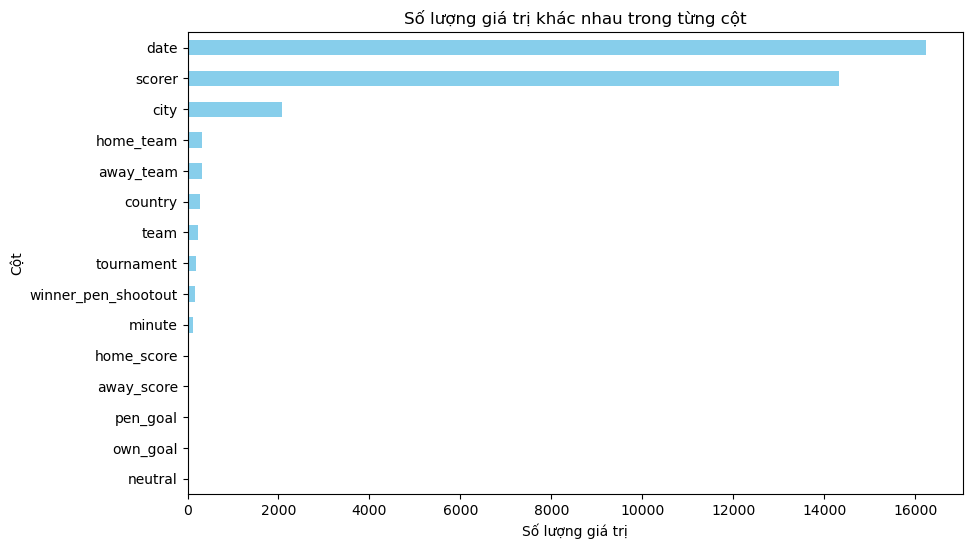

In [29]:
# Biểu đồ thanh hiển thị số lượng giá trị khác nhau trong mỗi cột
unique_values = df.nunique()
unique_values.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')

plt.title('Số lượng giá trị khác nhau trong từng cột')
plt.xlabel('Số lượng giá trị')
plt.ylabel('Cột')
plt.show()

**Nhận xét:**
- Cột `date` có số lượng giá trị khác nhau cao nhất, vì mỗi trận đấu diễn ra vào các ngày khác nhau, dẫn đến nhiều ngày độc nhất.
- Cột `scorer` có số lượng giá trị gần bằng với cột `date`, điều này gợi ý rằng hầu hết các trận đấu đều có thông tin về cầu thủ ghi bàn.
- Số lượng giá trị khác nhau trong cột `city` ít hơn hẳn so với `date` và `scorer`. Có thể là do nhiều trận đấu được tổ chức ở một số thành phố phổ biến.

#### Kiểm tra giá trị thiếu trong mỗi cột

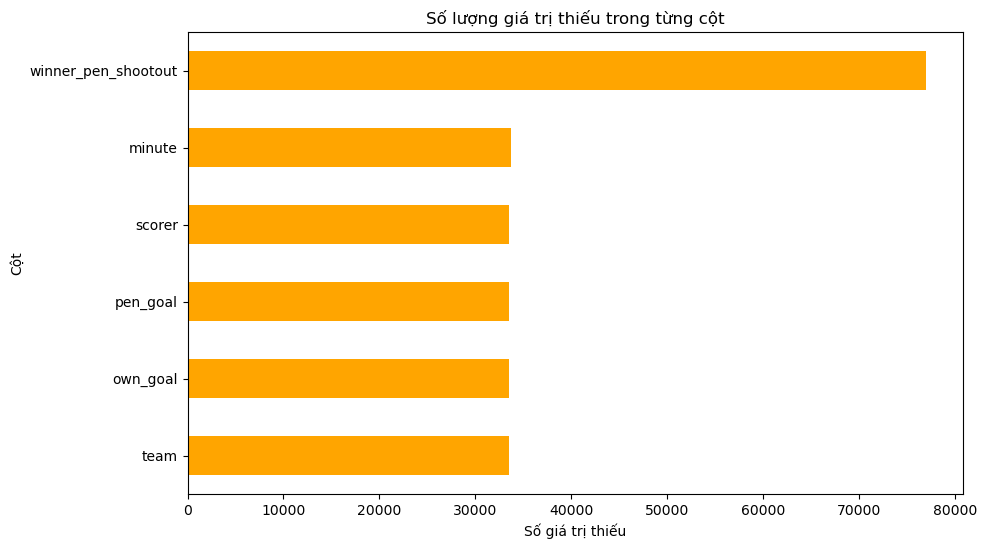

In [30]:
# Biểu đồ giá trị thiếu trong mỗi cột
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values().plot(kind='barh', figsize=(10, 6), color='orange')

plt.title('Số lượng giá trị thiếu trong từng cột')
plt.xlabel('Số giá trị thiếu')
plt.ylabel('Cột')

plt.show()

**Nhận xét:**
- Số lượng giá trị thiếu trong cột `winner_pen_shootout` là cao nhất, vượt xa so với các cột khác.
- Cột `minute`, `scorer`, `pen_goal`, `own_goal`, `team`: các cột này có số lượng giá trị thiếu tương đối đồng đều.
- Đánh giá dữ liệu trên: việc thiếu dữ liệu trong các cột trên có thể ảnh hưởng đến chất lượng phân tích, đặc biệt với winner nhưng nó chỉ chiếm một phần nhỏ so với tổng kích thước tập dữ liệu (rất lớn), nên nó không gây ảnh hưởng nghiêm trọng đến kết quả.

---

## Asking meaningful questions

| Câu hỏi | Ý nghĩa |
| --- | --- |
| Liệu đội chủ nhà có khả năng giành chiến thắng cao hơn hay không? | Đưa ra cái nhìn chính xác hơn về giả thuyết phổ biến từ lâu nay: đội chủ nhà có nhiều lợi thế do đó khả năng chiến thắng cao hơn. Liệu giả thuyết ấy có đúng hay chỉ là ngộ nhận từ đông đảo người xem bóng đá? Trả lời câu hỏi này sẽ giúp chúng ta sáng tỏ hơn. |
| Qua từng thời kỳ, đâu là đội tuyển có thành tích ấn tượng nhất? | Xác định đội tuyển xuất sắc nhất trong từng thời kỳ, làm rõ sự nổi bật của các đội qua thời gian. Từ đó ta có thể đánh giá chiến lược thi đấu hoặc khả năng duy trì phong độ của các đội. |
| Đâu là những chân sút xuất sắc nhất từ trước đến nay? | Ghi nhận và vinh danh những cầu thủ có thành tích ghi bàn tốt nhất trong lịch sử bóng nam quốc tế. |
| Khoảng thời gian nào trong trận đấu có thường xuất hiện nhiều bàn thắng (kể cả phạt đền và phản lưới nhà) nhất? | Phân bố bàn thắng theo thời gian giúp chúng ta hiểu rõ hơn về thời điểm mà các đội bóng có xu hướng ghi bàn nhiều nhất. Bên cạnh đó ta cũng có thể thấy những yếu tố khác nhau tác động vào kết quả trận đấu và rút ra được các chiến thuật quan trọng, như khả năng ghi bàn trong các hiệp, hoặc trong các loạt sút luận lưu. |
| Tần suất các cầu thủ ghi bàn nhiều hơn một bàn trong một trận đấu (cú đúp, hat-trick) có thay đổi theo thời kỳ không? | Việc ghi nhiều bàn thắng trong một trận đấu phản ánh năng lực cá nhân của cầu thủ và sự hỗ trợ từ đồng đội, cùng với mức độ phòng thủ của đối thủ. Do đó trả lời câu hỏi này sẽ giúp ta hiểu rõ hơn về sự thay đổi trong chiến thuật bóng đá qua thời gian. |
| Khoảng thời gian nào trong năm là thời gian sôi động nhất của bóng đá quốc tế? | Giúp cho những Fan hâm mộ bóng đá có thể lên kế hoạch theo dõi các trận đấu sôi động nhất. Ngoài ra còn giúp các nhà đầu tư/tài trợ để biết được thời điểm vàng để triển khai chiến lược quảng cáo. |
| Đâu sẽ là những đội tuyển thống trị bóng đá nam toàn cầu trong thời gian tới? |  Giúp được chuyên gia, nhà đầu tư, người hâm mộ hiểu được bối cảnh của bóng đá thế giới trong thời gian tới. |

---

## Preprocessing + analyzing data to answer each question

**<font color='orange'>Câu hỏi 1:</font>** Liệu đội chủ nhà có khả năng giành chiến thắng cao hơn hay không?

**Ý nghĩa**: Đưa ra cái nhìn chính xác hơn về giả thuyết phổ biến từ lâu nay: đội chủ nhà có nhiều lợi thế do đó khả năng chiến thắng cao hơn. Liệu giả thuyết ấy có đúng hay chỉ là ngộ nhận từ đông đảo người xem bóng đá? Trả lời câu hỏi này sẽ giúp chúng ta sáng tỏ hơn.

**Các bước thực hiện**: 
1. Loại bỏ các trận đấu được diễn ra ở sân trung lập.
2. Tính tổng bàn thắng của các đội chủ nhà, các đội khách; trực quan hóa.
3. Tính tổng bàn thắng của các đội chủ nhà, các đội khách qua từng giai đoạn; trực quan hóa.
4. Tạo cột mới có tên `home_win`, trong đó:
    - `1` nếu đội chủ nhà chiến thắng.
    - `0` nếu đội khách chiến thắng.
    - `0.5` nếu hòa.
5. Tính tỷ lệ chiến thắng của đội chủ nhà, đội khách; trực quan hóa.
6. Tính tỷ lệ chiến thắng của đội chủ nhà qua từng giai đoạn; trực quan hóa.

#### Pre-processing

1. Loại bỏ các trận đấu được diễn ra ở sân trung lập:

In [31]:
df1 = df.copy()

In [32]:
# Xóa các dòng có giá trị tại cột 'neutral' là True
df1 = df1[df1['neutral'] != True]

In [33]:
# Kiểm tra xem cột 'neutral' gồm toàn giá trị False hay chưa
assert df1['neutral'].all() == False

- Bây giờ ta đã có 1 DataFrame chỉ gồm các trận đấu được tổ chức trên sân của các đội chủ nhà.

#### Analyzing to get the answer

2. Tính tổng bàn thắng của các đội chủ nhà, các đội khách; trực quan hóa:
- Lưu tổng số bàn thắng của các đội chủ nhà vào `total_home_teams_goals`.
- Lưu tổng số bàn thắng của các đội khách vào `total_away_teams_goals`.

In [34]:
total_home_teams_goals = df1['home_score'].sum()
total_away_teams_goals = df1['away_score'].sum()
print(f'Total home teams goals: {total_home_teams_goals}')
print(f'Total away teams goals: {total_away_teams_goals}')

Total home teams goals: 131745
Total away teams goals: 74253


- Vẽ biểu đồ cột để trực quan hóa 2 biến này.

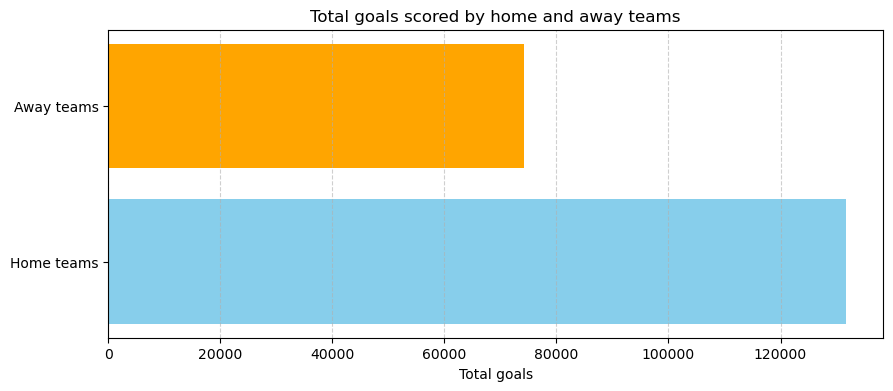

In [35]:
plt.figure(figsize=(10, 4))
plt.barh(['Home teams', 'Away teams'], [total_home_teams_goals, total_away_teams_goals], color=['skyblue', 'orange'])
plt.title('Total goals scored by home and away teams')
plt.xlabel('Total goals')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

**Nhận xét:**
- Tổng số bàn thắng của các đội chủ nhà ghi được (*131745 bàn*) lớn hơn rất nhiều so với tổng số bàn thắng của các đội khách (*74253 bàn*), chênh lệch hơn 57 nghìn bàn.
- Đây là cái nhìn từ tổng thể cả chiều dài lịch sử, để hiểu chi tiết hơn ta sẽ chia thành các giai đoạn để quan sát.

3. Tính tổng bàn thắng của các đội chủ nhà, các đội khách qua từng giai đoạn; trực quan hóa:
- 1872-2024 chia thành 9 giai đoạn, mỗi giai đoạn 17 năm
- Tạo DataFrame period_goals gồm:
    - 3 cột `period`, `home_teams_goals` và `away_teams_goals`.
    - 9 dòng tương ứng với 9 giai đoạn.

In [36]:
periods = np.arange(1872, 2025, 17)
list_str_periods = [f'{period}-{period + 16}' for period in periods]
periods_goals = pd.DataFrame({'period': list_str_periods, 'home_teams_goals': 0, 'away_teams_goals': 0})
periods_goals

,period,home_teams_goals,away_teams_goals
0,1872-1888,0,0
1,1889-1905,0,0
2,1906-1922,0,0
3,1923-1939,0,0
4,1940-1956,0,0
5,1957-1973,0,0
6,1974-1990,0,0
7,1991-2007,0,0
8,2008-2024,0,0


- Tính số bàn thắng của đội chủ nhà, đội khách tương ứng với từng giai đoạn.

In [37]:
for idx, start_year in enumerate(periods):
    end_year = start_year + 16 

    # Lọc dữ liệu trong từng giai đoạn
    period_data = df[(df['date'].dt.year >= start_year) & (df['date'].dt.year <= end_year)]
    
    # Cập nhật số bàn thắng cho đội chủ nhà và đội khách
    periods_goals.loc[idx, 'home_teams_goals'] = period_data['home_score'].sum()
    periods_goals.loc[idx, 'away_teams_goals'] = period_data['away_score'].sum()

In [38]:
periods_goals

,period,home_teams_goals,away_teams_goals
0,1872-1888,185,153
1,1889-1905,318,202
2,1906-1922,1424,1034
3,1923-1939,7486,4896
4,1940-1956,8168,5728
5,1957-1973,20219,12604
6,1974-1990,23721,13727
7,1991-2007,55749,32974
8,2008-2024,56140,37429


- Vẽ biểu đồ cột để trực quan hóa DataFrame trên

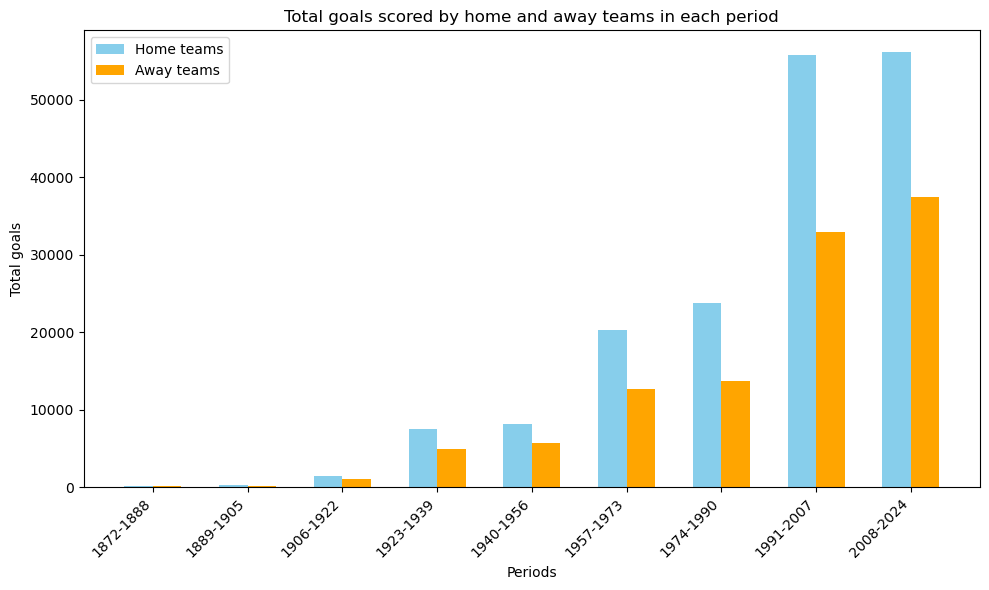

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.3 # Độ rộng của cột
# Tạo mảng chỉ mục để xác định vị trí của các cột
index = np.arange(len(periods_goals))

bar1 = ax.bar(index, periods_goals['home_teams_goals'], bar_width, label='Home teams', color='skyblue')
bar2 = ax.bar(index + bar_width, periods_goals['away_teams_goals'], bar_width, label='Away teams', color='orange')

ax.set_xlabel('Periods')
ax.set_ylabel('Total goals')
ax.set_title('Total goals scored by home and away teams in each period')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(periods_goals['period'], rotation=45, ha='right')

ax.legend()

plt.tight_layout()
plt.show()


**Nhận xét:**
- Qua từng giai đoạn, ta thấy tổng số bàn thắng của các đội chủ nhà ghi được lớn hơn khá nhiều so với tổng số bàn thắng của các đội khách.
- Giai đoạn 1872-1888 và 1889-1905, số bàn thắng quá ít so với phần còn lại nên ta khó có thể quan sát nhưng dựa vào `periods_goals` cũng có thể thấy bàn thắng đội nhà đều lớn hơn đội khách.
- 3 giai đoạn tiếp theo từ 1906 đến 1956, các đội chủ nhà ghi bàn chênh lệch cao hơn các đội khách không nhiều. Nhưng từ các giai đoạn về sau thì sự chênh lệch lớn hơn rất nhiều.
- Đây là một ý quan trọng nữa để đưa ra câu trả lời cuối cùng, sau đây ta tiếp tục tìm hiểu về tỷ lệ chiến thắng.

4. Tạo cột mới có tên `home_win`, trong đó:
    - `1` nếu đội chủ nhà chiến thắng.
    - `0` nếu đội khách chiến thắng.
    - `0.5` nếu hòa.

In [40]:
df1['home_win'] = df1.apply(lambda row: 1 if row['home_score'] > row['away_score'] 
                                        else (0 if row['home_score'] < row['away_score'] else 0.5), axis=1)

In [41]:
df1['home_win'].unique()

array([0.5, 1. , 0. ])

5. Tính tỷ lệ chiến thắng của đội chủ nhà, đội khách; trực quan hóa:
- Tính tỷ lệ chiến thắng của đội chủ nhà và lưu vào `home_teams_win_rate`
- Tính tỷ lệ chiến thắng của đội khách và lưu vào `away_teams_win_rate`
- Tính tỷ lệ hòa và lưu vào `draw_rate`

In [42]:
home_teams_win_rate = (df1['home_win'].value_counts(normalize=True)[1] * 100).__round__(2)
away_teams_win_rate = (df1['home_win'].value_counts(normalize=True)[0] * 100).__round__(2)
draw_rate = (df1['home_win'].value_counts(normalize=True)[0.5] * 100).__round__(2)

In [43]:
home_teams_win_rate, away_teams_win_rate, draw_rate

(54.67, 26.74, 18.59)

- Vẽ biểu đồ tròn để trực quan hóa.

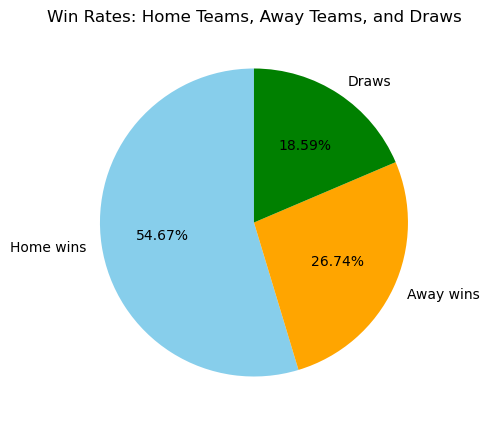

In [44]:
labels = ['Home wins', 'Away wins', 'Draws']
rates = [home_teams_win_rate, away_teams_win_rate, draw_rate]

plt.figure(figsize=(5, 5))
plt.pie(rates, labels=labels, autopct='%1.2f%%', startangle=90, colors=['skyblue', 'orange', 'green'])
plt.title('Win Rates: Home Teams, Away Teams, and Draws')
plt.show()

**Nhận xét:**
- Tỷ lệ chiến thắng của đội chủ nhà chiếm áp đảo (54.67%), trong khi đó tỷ lệ chiến thắng của đội khách ít hơn một nửa (gần 27.74%).
- Rõ ràng điều này càng chứng minh cho khả năng chiến thắng của đội chủ nhà sẽ cao hơn.
- Tuy nhiên ta vẫn nên đào sâu thêm vào từng giai đoạn xem các tỷ lệ này thay đổi thế nào.

6. Tính tỷ lệ chiến thắng của đội chủ nhà qua từng giai đoạn; trực quan hóa:
- 1872-2024 chia thành 9 giai đoạn, mỗi giai đoạn 17 năm
- Tạo DataFrame period_results gồm:
    - 4 cột `period`, `home_win_rate`, `away_win_rate` & `draw_rate`.
    - 9 dòng tương ứng với 9 giai đoạn.

In [45]:
period_results = pd.DataFrame({'period': list_str_periods, 'home_win_rate': 0, 'away_win_rate': 0, 'draw_rate': 0})
period_results

,period,home_win_rate,away_win_rate,draw_rate
0,1872-1888,0,0,0
1,1889-1905,0,0,0
2,1906-1922,0,0,0
3,1923-1939,0,0,0
4,1940-1956,0,0,0
5,1957-1973,0,0,0
6,1974-1990,0,0,0
7,1991-2007,0,0,0
8,2008-2024,0,0,0


- Tính tỷ lệ tương ứng cho từng giai đoạn.

In [46]:
# Hàm tính tỷ lệ các kết quả (1, 0, 0.5) trong một giai đoạn
def calculate_rates(start, end):
    # Lọc các trận đấu trong khoảng thời gian [start, end]
    period_data = df1[(df1['date'].dt.year >= start) & (df1['date'].dt.year <= end)]
    # Tính tỷ lệ từng loại kết quả
    value_counts = period_data['home_win'].value_counts(normalize=True) * 100
    home_win_rate = value_counts.get(1, 0)
    away_win_rate = value_counts.get(0, 0)
    draw_rate = value_counts.get(0.5, 0)
    return home_win_rate, away_win_rate, draw_rate

In [47]:
# Lặp qua từng giai đoạn và tính các tỷ lệ
for idx, start_year in enumerate(periods):
    end_year = start_year + 16
    # Tính tỷ lệ
    home_rate, away_rate, draw_rate = calculate_rates(start_year, end_year)
    
    period_results.loc[idx, 'home_win_rate'] = home_rate
    period_results.loc[idx, 'away_win_rate'] = away_rate
    period_results.loc[idx, 'draw_rate'] = draw_rate

In [48]:
period_results = period_results.round(2)
period_results

,period,home_win_rate,away_win_rate,draw_rate
0,1872-1888,51.61,38.71,9.68
1,1889-1905,47.86,32.48,19.66
2,1906-1922,50.55,29.56,19.89
3,1923-1939,54.25,30.00,15.75
4,1940-1956,53.42,30.99,15.59
5,1957-1973,56.74,25.62,17.64
6,1974-1990,54.43,24.79,20.78
7,1991-2007,55.52,25.84,18.65
8,2008-2024,53.72,27.87,18.41


- Vẽ biểu đồ miền để trực quan hóa sự thay đổi của các tỷ lệ qua từng giai đoạn.

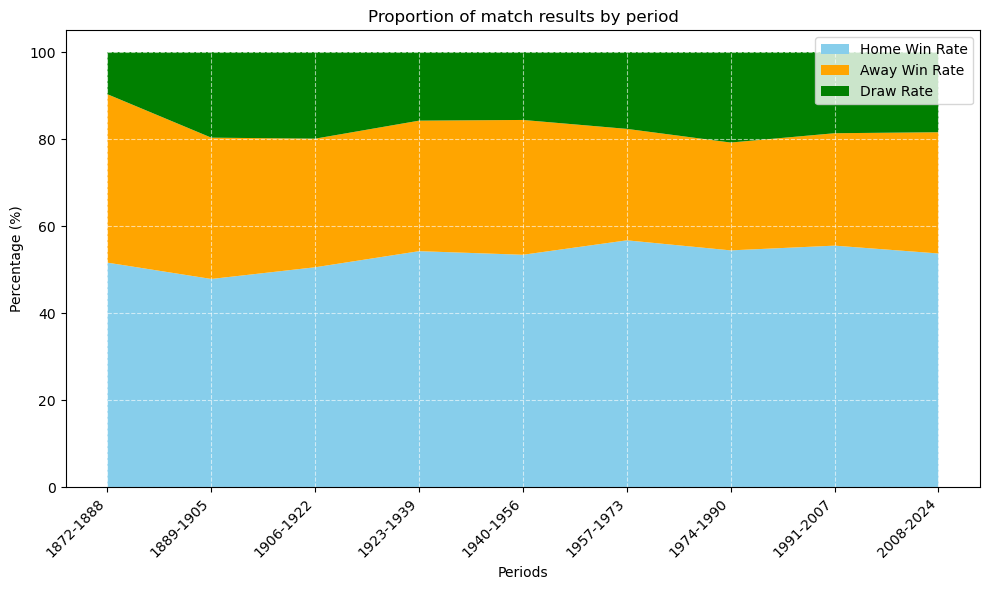

In [49]:
plt.figure(figsize=(10, 6))
plt.stackplot(
    period_results['period'], 
    period_results['home_win_rate'], 
    period_results['away_win_rate'], 
    period_results['draw_rate'], 
    labels=['Home Win Rate', 'Away Win Rate', 'Draw Rate'], 
    colors=['skyblue', 'orange', 'green']
)
plt.grid(axis='both', linestyle='--', color='white', alpha=0.6)
plt.title('Proportion of match results by period')
plt.xlabel('Periods')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Nhận xét:**
- Tỷ lệ chiến thắng của đội chủ nhà khá ổn định qua từng giai đoạn, phần lớn đều trên 50%.
- Tỷ lệ chiến thắng của đội khách cũng không biến động quá lớn, hầu hết chiếm trên dưới 30% ở ở mỗi giai đoạn.
- Tỷ lệ chiến thắng của đội chủ nhà cao hơn rõ rệt so với đội khách khi ta quan sát ở các giai đoạn.

#### Conclusion

Qua những phân tích và trực quan kết quả ở trên, ta có thể kết luận: ***đội chủ nhà có khả năng giành chiến thắng cao hơn***.

Các tác nhân ảnh hưởng:
- Lợi thế sân nhà:
    - Đội chủ nhà thường quen thuộc với mặt sân, điều kiện thi đấu và thời tiết, giúp họ có thể đạt hiệu suất thi đấu tốt hơn.
    - Trong khi đó, đội khách có thể phải đối mặt với những bất lợi như hành trình di chuyển dài, chênh lệch múi giờ và môi trường không quen thuộc.
- Cố động viên:
    - Sự cổ vũ nhiệt tình từ khán giả nhà tạo động lực tâm lý lớn cho đội chủ nhà.
    - Sự cuồng nhiệt từ cổ động viên chủ nhà cũng sẽ gây áp lực lớn đến đội khách, đặc biệt là những lúc họ kiểm soát bóng.
- Tiết kiệm thời gian:
    - Đội chủ nhà không phải di chuyển xa, không tốn thời gian và không bị áp lực khi phải làm quen với mặt sân và điều kiện thi đấu trong thời gian có hạn như đội khách.
    - Quan trọng hơn nữa là có nhiều điều kiện nghiên cứu đối thủ đến làm khách.

---

**<font color='orange'>Câu hỏi 2:</font>** Qua từng thời kỳ, đâu là đội tuyển có thành tích ấn tượng nhất?

**Ý nghĩa**: Xác định đội tuyển xuất sắc nhất trong từng thời kỳ, làm rõ sự nổi bật của các đội qua thời gian. Từ đó ta có thể đánh giá chiến lược thi đấu hoặc khả năng duy trì phong độ của các đội.

**Các bước thực hiện**: 
- Dataset là dữ liệu bóng đá trong khoảng thời gian 1872-2024, ta sẽ chia ra làm 17 gian đoạn 9 năm
 - Với mỗi thời kì ta tính tỉ lệ thắng của mỗi đội :

$$
\text{Tỷ lệ thắng của mỗi đội} = \frac{\text{số trận thắng mỗi đội}}{\text{tổng số trận đấu mà đội đó tham gia}}
$$

 - Sau đó ta sẽ chọn ra đội có tỷ lệ thắng cao nhất của mỗi thời kì và lưu lại vào data frame
 - Cuối cùng dùng các biểu đồ (line, barh, pie..vv) để trực quan data frame trên


#### Pre-processing

Tạo thêm một cột `period` để lưu giai đoạn của từng trận đấu từ 1872-2024

In [50]:
df2 = df.copy()
df2['period'] = (df2['date'].dt.year - 1872) // 9 + 1
df2[['date','period']]

,date,period
0,1872-11-30,1
1,1873-03-08,1
2,1874-03-07,1
3,1875-03-06,1
4,1876-03-04,1
...,...,...
77780,2024-11-19,17
77781,2024-11-19,17
77782,2024-11-19,17
77783,2024-11-19,17


Tạo thêm 2 cột nữa `home_team_win` và `away_team_win` để lưu tỷ lệ thắng của mỗi đội trong từng gia đoạn

In [51]:
df2['home_team_win'] = df2['home_score'] > df2['away_score']
df2['away_team_win'] = df2['away_score'] > df2['home_score']
df2[['date','period','home_team_win','away_team_win']]

,date,period,home_team_win,away_team_win
0,1872-11-30,1,False,False
1,1873-03-08,1,True,False
2,1874-03-07,1,True,False
3,1875-03-06,1,False,False
4,1876-03-04,1,True,False
...,...,...,...,...
77780,2024-11-19,17,False,True
77781,2024-11-19,17,False,False
77782,2024-11-19,17,False,False
77783,2024-11-19,17,True,False


#### Analyzing to get the answer

Tính toán tỷ lệ thắng 
- Dựa vào dữ liệu đã được tiền xử lý, tính tỷ lệ thắng cho mỗi đội trong các giai đoạn để biết đội nào có tỷ lệ thắng cao nhất

In [52]:
#Tạo một bảng thống kê số trận thắng cho từng đội trong mỗi giai đoạn
team_wins = pd.DataFrame(columns=['team', 'period', 'win_count', 'total_matches'])

for period in df2['period'].unique():
    period_data = df2[df2['period'] == period]

    #Đếm số bàn thắng của mỗi đội
    home_wins = period_data[period_data['home_team_win']]['home_team'].value_counts()
    away_wins = period_data[period_data['away_team_win']]['away_team'].value_counts()
    
    #lưu tổng số trận thắng của các đội (chơi ở vai trò đội nhà và đội khách)
    wins = home_wins.add(away_wins, fill_value=0)

    #Tổng số trận đấu của các đội chơi (chơi ở vai trò đội nhà và đội khách)
    total_match = pd.concat([period_data['home_team'], period_data['away_team']]).value_counts()


    #Gộp kết quả
    result = pd.DataFrame({
        'team': wins.index,
        'win_count': wins.values,
        'total_matches': total_match[wins.index].values
    })

    #Tính tỷ lệ
    result['win_rate'] = result['win_count'] / result['total_matches']
    result['period'] = period

    #Tạo dataFrame
    team_wins = pd.concat([team_wins, result], ignore_index=True)

Từ kết quả bên tra ta sẽ lọc ra các đội có tỷ lệ thắng cao nhất qua từng thời kì

In [53]:
index_best_team = team_wins.groupby('period')['win_rate'].idxmax()
best_team = team_wins.loc[index_best_team]
best_team

,team,period,win_count,total_matches,win_rate
0,Scotland,1,10,14,0.714286
5,Scotland,2,21.0,25,0.840000
8,England,3,21.0,27,0.777778
18,Guernsey,4,5.0,5,1.000000
33,Denmark,5,11.0,12,0.916667
54,Asturias,6,1.0,1,1.000000
107,Australia,7,3.0,3,1.000000
179,Brittany,8,1.0,1,1.000000
251,Catalonia,9,1.0,1,1.000000
357,Croatia,10,1.0,1,1.000000


Dùng biểu đồ đường để trực quan các đội xuất sắc nhất trong `best_team`

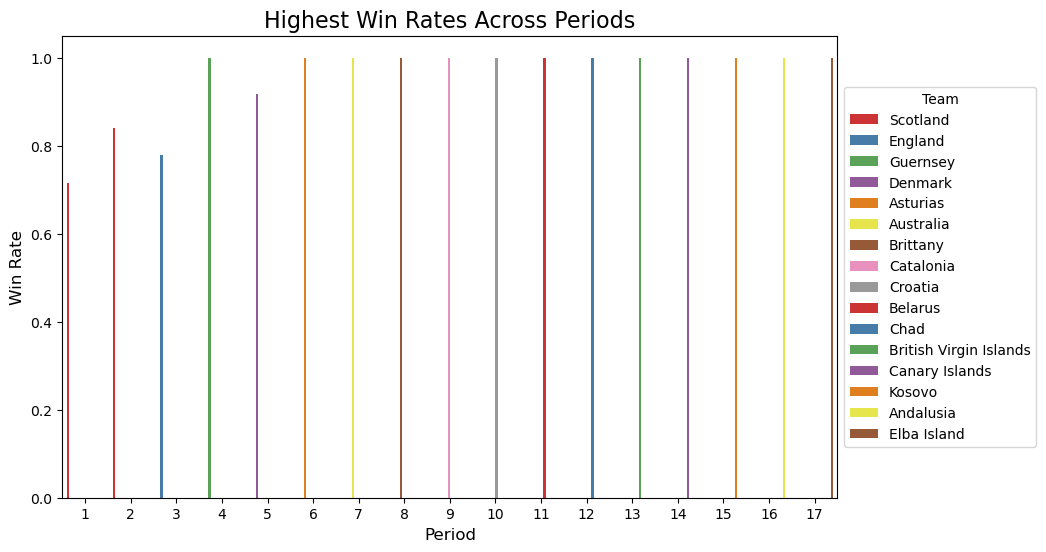

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(data=best_team, x='period', y='win_rate', hue='team', palette='Set1')
plt.title('Highest Win Rates Across Periods', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Win Rate', fontsize=12)

plt.legend(title='Team', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

plt.show()

Nhận xét biểu đồ trên:
- Qua từng thời kì tỷ lệ xuất sắc của các quốc gia có xu hướng tăng dần và đều đặn ở mức chiến thắng 100% trên các trận đã thi đấu từ thời kì 6-17. Điều này cho thấy sự vượt trội của các đội trong từng gia đoạn nhất định
- Một vài đội bóng có tỷ lệ thắng thấp hơn trong các thời kì  trong đó thấp nhấp là Scotland với tỷ lệ thắng 0.714. Có thể là do hiệu suất thi đấu cả các đội chưa quá mạnh vào những thời kì đầu mà nguyên nhân có thể là chưa có những chiến thuật, cách huấn luyện, phúc lợi ...vv phù hợp cho các đội bóng

Ta có thể thống kê xem phân bố tỷ lệ thắng của các đội.

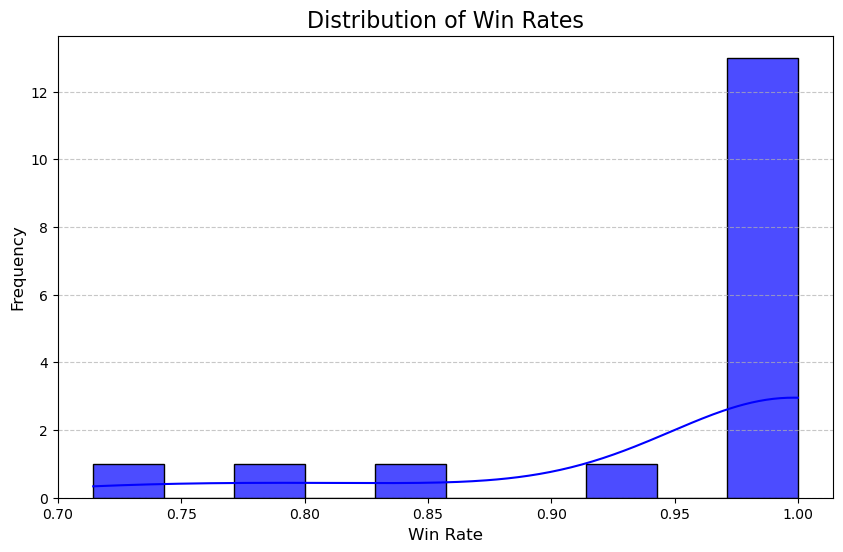

In [55]:
plt.figure(figsize=(10, 6))

sns.histplot(best_team['win_rate'], kde=True, bins=10, color='blue', alpha=0.7)

plt.title('Distribution of Win Rates', fontsize=16)
plt.xlabel('Win Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Nhập xét biểu đồ trên:
- Ta thấy tỷ lệ thắng tập trung chủ yếu ở mức 1.00 với tần suất cao nhất, khoảng 12 lần.
- Các tỷ lệ thắng từ 0.7-0.95 có tần suất rất thấp chỉ khoảng 1-2 lần

#### Conclusion

Bài toán phân tích tỷ lệ thắng của các đội qua các giai đoạn đã cung cấp cái nhìn sâu sắc về hiệu suất thi đấu của các đội, đồng thời giúp phát hiện những điểm đáng chú ý như sự phân bố không đồng đều của tỷ lệ thắng, cũng như các giá trị ngoại lai. Những phân tích này sẽ là cơ sở để đưa ra các chiến lược cải thiện và tối ưu hóa cho các đội trong tương lai, cũng như cải thiện hiểu biết về các yếu tố tác động đến thành tích thi đấu.

---

**<font color='orange'>Câu hỏi 3:</font>** Đâu là những chân sút xuất sắc nhất từ trước đến nay?

**Ý nghĩa**: Ghi nhận và vinh danh những cầu thủ có thành tích ghi bàn tốt nhất trong lịch sử bóng nam quốc tế.

**Các bước thực hiện**: 
1. Loại bỏ các dòng có giá trị ở cột `scorer` là Nan.
2. Tính tổng số bàn thắng của các cầu thủ từng ghi bàn, chọn ra top 10 để trực quan hóa.
3. Tính tỷ lệ số bàn penalty trên tổng số bàn thắng của top 10 cầu thủ nói trên; trực quan hóa.
4. Tìm top 10 vua phá lưới ở 2 giải đấu hấp dẫn nhất hành tinh:
    - **FIFA World Cup**
    - **UEFA Euro**

#### Pre-processing

1. Loại bỏ các dòng có giá trị ở cột `scorer` là Nan:

In [56]:
df3 = df.copy()

In [57]:
# Loại bỏ các dòng có giá trị NaN tại cột `scorer`
df3 = df3.dropna(subset=['scorer'])

In [58]:
# Kiểm tra xem cột `scorer` còn giá trị NaN hay không
assert df3['scorer'].isnull().sum() == 0

- Bây giờ ta đã có 1 DataFrame chỉ gồm các trận đấu có xuất hiện ít nhất 1 bàn thắng.
- Tuy nhiên, ta vẫn cần loại bỏ các bàn thắng phản lưới nhà.

In [59]:
# Loại bỏ các dòng có giá trị True tại cột `own_goal`
df3 = df3[df3['own_goal'] != True]

In [60]:
# Kiểm tra xem cột `own_goal` chỉ chứa giá trị False hay chưa
assert df3['own_goal'].all() == False

#### Analyzing to get the answer

2. Tính tổng số bàn thắng của các cầu thủ từng ghi bàn, chọn ra top 10 để trực quan hóa:
- Tạo một DataFrame `Scorers` gồm 3 cột `scorer`, `team`, `total_goals`.
- Tính số bàn thắng mà từng cầu thủ đã ghi được và sắp xếp từ nhiều đến ít bàn nhất.

In [61]:
scorers = df3.groupby(['scorer', 'team']).size().reset_index(name='total_goals')
scorers = scorers.sort_values(by='total_goals', ascending=False)
scorers

,scorer,team,total_goals
2534,Cristiano Ronaldo,Portugal,108
11066,Robert Lewandowski,Poland,61
11262,Romelu Lukaku,Belgium,60
4989,Harry Kane,England,58
7746,Lionel Messi,Argentina,55
...,...,...,...
8135,Manny Rodríguez,Dominican Republic,1
8134,Manjrekar James,Canada,1
8133,Maninho,Mozambique,1
8131,Mani Stenter,Cook Islands,1


- Chọn ra top 10 cầu thủ ghi bàn nhiều nhất.

In [62]:
top_10_scorers = scorers.head(10).copy().reset_index(drop=True)
top_10_scorers

,scorer,team,total_goals
0,Cristiano Ronaldo,Portugal,108
1,Robert Lewandowski,Poland,61
2,Romelu Lukaku,Belgium,60
3,Harry Kane,England,58
4,Lionel Messi,Argentina,55
5,Edin Džeko,Bosnia and Herzegovina,50
6,Ali Daei,Iran,49
7,Miroslav Klose,Germany,48
8,Aleksandar Mitrović,Serbia,47
9,Carlos Ruiz,Guatemala,47


- Dùng biểu đồ cột để trực quan hóa kết quả.

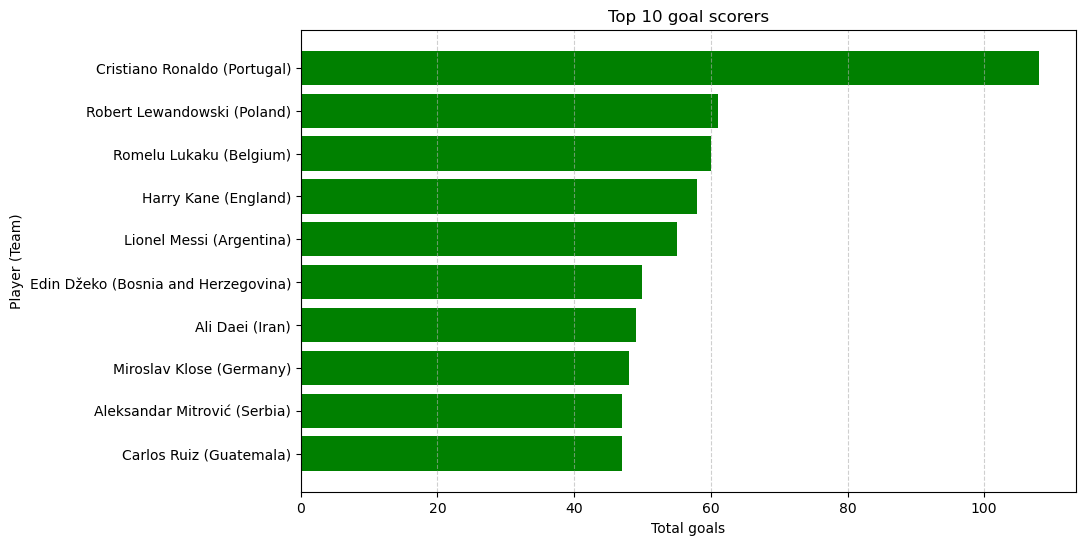

In [63]:
top_10_scorers.loc[:, 'player_team'] = top_10_scorers['scorer'] + ' (' + top_10_scorers['team'] + ')'

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(top_10_scorers['player_team'], top_10_scorers['total_goals'], color='green')
plt.xlabel('Total goals')
plt.ylabel('Player (Team)')
plt.title('Top 10 goal scorers')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.show()

**Nhận xét:**
- Có sự chênh lệch khá lớn giữa cầu thủ có nhiều bàn thắng nhất so với phần còn lại trong top 10.
- **Cristiano Ronaldo** của đội tuyển Bồ Đào Nha, với 108 bàn thắng, là cầu thủ dẫn đầu.
- Xếp sau đó là các cầu thủ cũng rất nổi tiếng với số bàn thắng khá ngang nhau, gồm **Lewandowski** của Ba Lan (61 bàn), **Lukaku** của Bỉ (60 bàn), **Kane** của Anh (58 bàn) và **Messi** của Argentina (55 bàn).
- 5 cầu thủ còn lại đa số đến từ các nền bóng đá ít hùng mạnh hơn, tuy nhiên có huyền thoại **Klose** của "Cỗ xe tăng" Đức với 48 bàn. Bên cạnh đó có sự xuất hiện của "Vua bóng đá" Iran **Ali Daei** (49 bàn), người từng nắm giữ kỷ lục ghi bàn cho đội tuyển quốc gia. Ngoài ra còn 2 cái tên vang bóng một thời như **Edin Džeko** và **Mitrović** (lần lượt 50 bàn và 47 bàn).
- Top 10 đều là huyền thoại của nền bóng đá quốc gia mình. Đặc biệt là 5 cầu thủ dẫn đầu đã và đang ghi vào sử sách của bóng đá đương đại.
- **Lưu ý:**
    - Kết quả trên chỉ đúng trong phạm vi đồ án này, có sự sai lệch so với thực tế vì tác giả của bộ dữ liệu gốc không thu thập được thông tin cầu thủ ghi bàn ở nhiều trận đấu.

3. Tính tỷ lệ số bàn penalty trên tổng số bàn thắng của top 10 cầu thủ nói trên; trực quan hóa:

In [64]:
# Tính số bàn penalty của mỗi cầu thủ từng ghi bàn trong 1 trận đấu
penalty_goals = (df3[df3['pen_goal'] == True].groupby(['scorer', 'team']).size()
                .reset_index(name='penalty_goals')
)

In [65]:
# Gộp số bàn penalty vào DataFrame top_10_scorers
top_10_scorers = pd.merge(
    top_10_scorers,
    penalty_goals,
    on=['scorer', 'team'],
    how='left'
)

In [66]:

top_10_scorers['penalty_goals'] = top_10_scorers['penalty_goals'].fillna(0).astype(int)

In [67]:
top_10_scorers['penalty_rate'] = (top_10_scorers['penalty_goals'] / top_10_scorers['total_goals'] * 100).round(2)

In [68]:
top_10_scorers

,scorer,team,total_goals,player_team,penalty_goals,penalty_rate
0,Cristiano Ronaldo,Portugal,108,Cristiano Ronaldo (Portugal),19,17.59
1,Robert Lewandowski,Poland,61,Robert Lewandowski (Poland),13,21.31
2,Romelu Lukaku,Belgium,60,Romelu Lukaku (Belgium),6,10.00
3,Harry Kane,England,58,Harry Kane (England),20,34.48
4,Lionel Messi,Argentina,55,Lionel Messi (Argentina),14,25.45
5,Edin Džeko,Bosnia and Herzegovina,50,Edin Džeko (Bosnia and Herzegovina),2,4.00
6,Ali Daei,Iran,49,Ali Daei (Iran),8,16.33
7,Miroslav Klose,Germany,48,Miroslav Klose (Germany),0,0.00
8,Aleksandar Mitrović,Serbia,47,Aleksandar Mitrović (Serbia),2,4.26
9,Carlos Ruiz,Guatemala,47,Carlos Ruiz (Guatemala),4,8.51


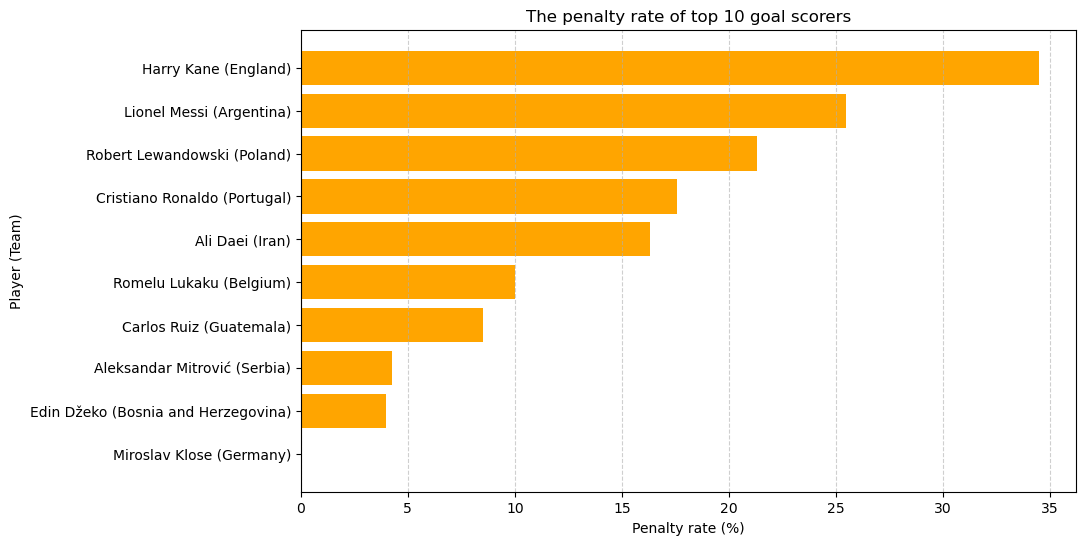

In [69]:
top_10_scorers = top_10_scorers.sort_values(by='penalty_rate', ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(top_10_scorers['player_team'], top_10_scorers['penalty_rate'], color='orange')
plt.xlabel('Penalty rate (%)')
plt.ylabel('Player (Team)')
plt.title('The penalty rate of top 10 goal scorers')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.show()

**Nhận xét:**
- Ta thấy rằng **Harry Kane** có tỷ lệ số bàn thắng từ chấm phạt đền cao nhất. Điều này cho thấy rằng Kane có khả năng chuyển hóa bàn thắng từ chấm penalty rất tốt. Và phần nào cho thấy lối chơi của đội tuyển Anh tập trung gây áp lực trong vòng cấm đối phương, từ đó dẫn đến nhiều tình huống đối phương phạm lỗi trong vòng cấm.
- Tỷ lệ của các cầu thủ còn lại giảm dần theo thứ tự. Có một điểm đặc biệt ở vị trí của **Miroslav Klose**, cầu thủ không có một bàn thắng nào từ chấm phạt đền. Cho thấy rằng **Klose** là một "sát thủ" thực sự không cần đến những pha penalty vẫn lọt top. Hoặc cũng có thể là anh chưa may mắn khi đứng trước chấm 11m (nếu có).
- Nhìn chung các chân sút tốt nhất trong lịch sử đều không chỉ giỏi ở những tình huống dứt điểm khác nhau mà còn thật sự chính xác khi thực hiện những tình huống đá phạt đền.

4. Tìm top 10 vua phá lưới ở 2 giải đấu hấp dẫn nhất hành tinh:
    - **FIFA World Cup**
    - **UEFA Euro**

- **FIFA World Cup:**

In [70]:
fifa_wc_scores = df3[df3['tournament'] == 'FIFA World Cup']

In [71]:
top_10_scorers_fifa_wc = fifa_wc_scores.groupby(['scorer', 'team']).size().reset_index(name='total_goals')
top_10_scorers_fifa_wc = top_10_scorers_fifa_wc.sort_values(by='total_goals', ascending=False).head(10)
top_10_scorers_fifa_wc

,scorer,team,total_goals
915,Miroslav Klose,Germany,16
1145,Ronaldo,Brazil,15
429,Gerd Müller,Germany,14
702,Just Fontaine,France,13
784,Lionel Messi,Argentina,13
756,Kylian Mbappé,France,12
1018,Pelé,Brazil,12
1239,Sándor Kocsis,Hungary,11
710,Jürgen Klinsmann,Germany,11
458,Grzegorz Lato,Poland,10


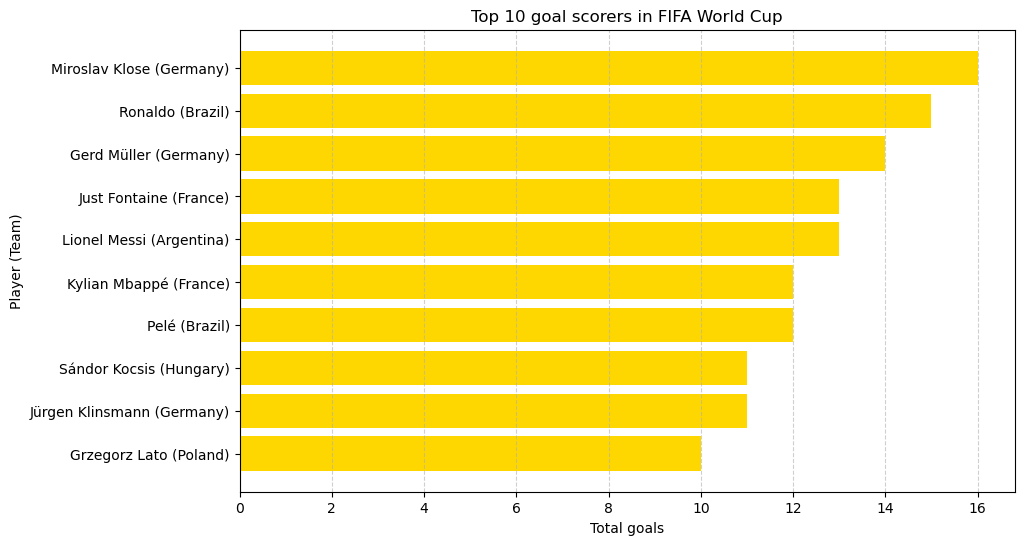

In [72]:
top_10_scorers_fifa_wc.loc[:, 'player_team'] = top_10_scorers_fifa_wc['scorer'] + ' (' + top_10_scorers_fifa_wc['team'] + ')'

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(top_10_scorers_fifa_wc['player_team'], top_10_scorers_fifa_wc['total_goals'], color='gold')
plt.xlabel('Total goals')
plt.ylabel('Player (Team)')
plt.title('Top 10 goal scorers in FIFA World Cup')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.show()

**Nhận xét:**
- Ở giải đấu lớn nhất hành tinh, "Vua phá lưới" gọi tên huyền thoại **Miroslav Klose** của Đức với 16 bàn.
- Sát theo sau là **Ronaldo** "béo" (15 bàn) của Brazil - đội tuyển với nhiều chức vô địch World Cup nhất.
- Tiếp đến có **Gerd Müller** cũng thuộc tuyển Đức với 14 bàn.
- Hầu hết top 10 là các danh thủ thuộc thế hệ trước, đặc biệt có sự hiện diện của biểu tượng bóng đá thế giới - "Vua bóng đá" **Pele**.
- Bên cạnh đó có sự góp mặt của 2 cầu thủ hiện vẫn còn thi đấu là huyền thoại **Lionel Messi** của Argentina (13 bàn) và ngôi sao **Kylian Mbappe** của đội tuyển Pháp (12 bàn).
- Hiện vẫn chưa có cầu thủ nào phá vỡ kỷ lục của **Klose** đã tồn tại được 10 năm. Đức cũng là đội tuyển có hàng công đáng gờm nhất tại World Cup với nhiều cầu thủ trong top 10 nhất.

- **UEFA Euro:**

In [73]:
uefa_euro_scores = df3[df3['tournament'] == 'UEFA Euro']

In [74]:
top_10_scorers_uefa_euro = uefa_euro_scores.groupby(['scorer', 'team']).size().reset_index(name='total_goals')
top_10_scorers_uefa_euro = top_10_scorers_uefa_euro.sort_values(by='total_goals', ascending=False).head(10)
top_10_scorers_uefa_euro

,scorer,team,total_goals
86,Cristiano Ronaldo,Portugal,14
337,Michel Platini,France,9
189,Harry Kane,England,7
32,Antoine Griezmann,France,7
6,Alan Shearer,England,7
539,Álvaro Morata,Spain,7
388,Patrick Kluivert,Netherlands,6
390,Patrik Schick,Czech Republic,6
428,Robert Lewandowski,Poland,6
450,Ruud van Nistelrooy,Netherlands,6


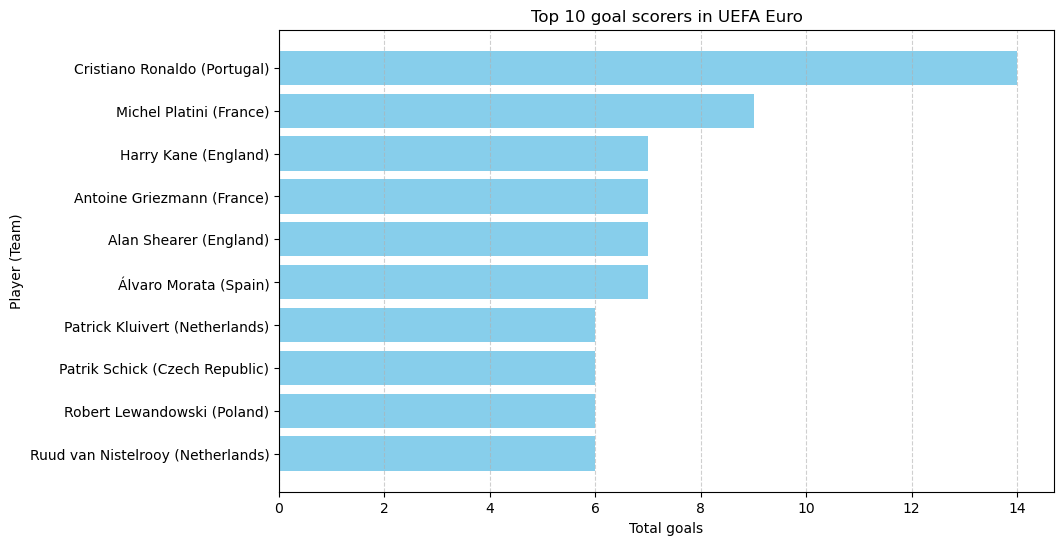

In [75]:
top_10_scorers_uefa_euro.loc[:, 'player_team'] = top_10_scorers_uefa_euro['scorer'] + ' (' + top_10_scorers_uefa_euro['team'] + ')'

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(top_10_scorers_uefa_euro['player_team'], top_10_scorers_uefa_euro['total_goals'], color='skyblue')
plt.xlabel('Total goals')
plt.ylabel('Player (Team)')
plt.title('Top 10 goal scorers in UEFA Euro')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.show()

**Nhận xét:**
- Ở giải đấu lớn thứ 2 hành tinh, huyền thoại **Cristiano Ronaldo** của Bồ Đào Nha dẫn dầu với 14 pha lập công, cách xa người xếp sau là cựu tuyển thủ **Platini** của Pháp (9 bàn).
- **Kane**, **Griezmann**, **Shearer** và **Morata** có cùng 7 bàn thắng.
- 4 cái tên còn lại đều có cùng 6 bàn, gồm 2 cựu danh thủ **Kluvert** và **Ruud van Nistelrooy** của Hà Lan, trung phong **Lewandowski** của Ba Lan và cầu thủ trẻ **Patrik Schick** của Cộng hòa Séc đã có mùa Euro 2021 chói sáng.

#### Conclusion

Qua những phân tích và trực quan của ở trên, chúng ta đã tìm ra được danh sách các chân sút xuất sắc nhất trong lịch sử bóng đá quốc tế, hầu hết đều là những huyền thoại ở cả thế hệ trước và thế hệ ngày nay.
- Cristiano Ronaldo, mặc dù là cầu thủ nhiều bàn thắng nhất trong lịch sử cũng như vòng chung kết EURO, tuy nhiên lại không góp mặt trong top 10 chân sút của vòng chung kết WORLD CUP. Trường hợp tương tự cũng dành cho **Harry Kane** và **Robert Lewandowski**.
- Điều đó cho ta thấy được sự khốc liệt và tính chất cạnh tranh của giải đấu lớn nhất hành tinh, không dễ dàng ghi bàn vào lưới đối thủ.
- **Messi** là cầu thủ xuất hiện ở cả 2 danh sách quan trọng, anh chính là đầu tàu đưa Argentina đến chức vô địch WORLD CUP 2022.
- Dành một lời tri ân đến những chân sút vĩ đại đã mang lại những cảm xúc bùng nổ cho toàn bộ người hâm mộ bóng đá trên thế giới.

---

**<font color='orange'>Câu hỏi 4:</font>** Khoảng thời gian nào trong trận đấu có thường xuất hiện nhiều bàn thắng (kể cả phạt đền và phản lưới nhà) nhất? (3 đối tượng)

**Ý nghĩa**:
- Phân bố bàn thắng theo thời gian giúp chúng ta hiểu rõ hơn về thời điểm mà các đội bóng có xu hướng ghi bàn nhiều nhất.
- Việc mà ta phân tích các bàn thắng `bình thường`, `phạt đền` và `phản lưới nhà` cũng có thể thấy những yếu tố khác nhau tác động vào kết quả trận đấu.
- Bên cạnh đó ta có thể rút ra được các chiến thuật quan trọng, như khả năng ghi bàn trong các hiệp, hoặc trong các loạt sút luận lưu.

**Các bước thực hiện**:
- Trước hết ta sẽ phân loại các bàn thắng: gồm có 3 loại
  - Bàn thắng bình thường 
  - Bàn thắng phạt đền (cột `pen_goal`)
  - Bàn phản lưới nhà (cột `own_goal`)
- Phân chia thời gian trong trận đấu: ta sẽ nhóm thời gian theo các khoảng sau:
  - 0-15 phút
  - 16-30 phút
  - 31-45 phút (hiệp 1)
  - 46-60 phút
  - 61-75 phút
  - 76-90 phút (hiệp 2)
  - 90 + phút (thêm giờ hoặc có sút luân lưu)
- Đếm số bàn thắng trong mỗi khoảng thời gian trên: đếm tổng số bàn thắng bao gồm bàn thắng `bình thường`, `phạt đền` và `phản lưới nhà` trong các khoảng thời gian đã liệt kê trên.
- So sánh các khoảng thời gian có số lượng bàn thắng nhiều nhất và phân loại chúng

#### Pre-processing

Lấy ra các cột có minute khác Nan để tính toán và phân tích

In [76]:
#Lấy ra các hàng có mà cột "minute" có gái trị khác Nan để phân tích
df4 = df.copy()
df4 = df4[df4['minute'].notna()]
df4.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,scorer,minute,own_goal,pen_goal,winner_pen_shootout
462,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,José Piendibene,44.0,False,False,NaN
463,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,Isabelino Gradín,55.0,False,False,NaN
464,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,Isabelino Gradín,70.0,False,False,NaN
465,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,José Piendibene,75.0,False,False,NaN
467,1916-07-06,Argentina,Chile,6,1,Copa América,Buenos Aires,Argentina,False,Argentina,Alberto Ohaco,2.0,False,False,NaN


Phân loại các mốc thời gian
- Định nghĩa một hàm (classify_time) để phân loại các phút trong trận đấu thành các khoảng thời gian.

In [77]:
def classify_time(minute):
    if minute <= 15:
        return "0-15 phút"
    elif minute <= 30:
        return "16-30 phút"
    elif minute <= 45:
        return "31-45 phút (hiệp 1)"
    elif minute <= 60:
        return "46-60 phút"
    elif minute <= 75:
        return "61-75 phút"
    elif minute <= 90:
        return "76-90 phút (hiệp 2)"
    else:
        return "90+ phút (bù giờ)"
df4['time_period'] = df4['minute'].apply(classify_time)
df4[['minute','time_period']]

,minute,time_period
462,44.0,31-45 phút (hiệp 1)
463,55.0,46-60 phút
464,70.0,61-75 phút
465,75.0,61-75 phút
467,2.0,0-15 phút
...,...,...
77264,90.0,76-90 phút (hiệp 2)
77265,47.0,46-60 phút
77266,73.0,61-75 phút
77267,86.0,76-90 phút (hiệp 2)


#### Analyzing to get the answer

Tạo thêm các cột cho từng loại bàn thắng.
Tạo các cột boolean mới để phân loại các loại bàn thắng (bình thường, phạt đền, phản lưới nhà).
- normal_goal: Nếu một bàn thắng không phải là phạt đền và không phải là phản lưới nhà, nó sẽ được coi là bàn thắng bình thường.
- penalty_goal: Được xác định trực tiếp từ cột pen_goal (True nếu là bàn thắng phạt đền).
- own_goal: Được xác định trực tiếp từ cột own_goal (True nếu là phản lưới nhà).

In [78]:
df4['normal_goal'] = ~df4['pen_goal'] & ~df4['own_goal']  # Bàn thắng bình thường
df4['penalty_goal'] = df4['pen_goal']  # Bàn thắng phạt đền
df4['own_goal'] = df4['own_goal']  # Bàn phản lưới nhà
df4[['normal_goal', 'penalty_goal', 'own_goal']]

,normal_goal,penalty_goal,own_goal
462,True,False,False
463,True,False,False
464,True,False,False
465,True,False,False
467,True,False,False
...,...,...,...
77264,True,False,False
77265,True,False,False
77266,True,False,False
77267,True,False,False


Tiếp theo ta sẽ đếm số bàn thắng trong khoảng thời gian cho từng loại
- Nhóm dữ liệu theo time_period (khoảng thời gian) và tính tổng số bàn thắng bình thường, phạt đền và phản lưới nhà trong mỗi khoảng thời gian.

In [79]:
time_goal_counts = df4.groupby('time_period').agg(
    normal_goals=('normal_goal', 'sum'),
    penalty_goals=('penalty_goal', 'sum'),
    own_goals=('own_goal', 'sum')
).reset_index()
time_goal_counts

,time_period,normal_goals,penalty_goals,own_goals
0,0-15 phút,5724,305,108
1,16-30 phút,6501,421,126
2,31-45 phút (hiệp 1),7357,584,133
3,46-60 phút,7320,444,138
4,61-75 phút,7514,516,142
5,76-90 phút (hiệp 2),9426,671,170
6,90+ phút (bù giờ),241,19,4


Tính tổng số bàn thắng cho từng khoảng
- Tính tổng số bàn thắng (bao gồm cả bàn thắng bình thường, phạt đền và phản lưới nhà) cho mỗi khoảng thời gian.

In [80]:
# Tính tổng số bàn thắng cho từng khoảng
time_goal_counts['total_goals'] = (
    time_goal_counts['normal_goals'] +
    time_goal_counts['penalty_goals'] +
    time_goal_counts['own_goals']
)
time_goal_counts

,time_period,normal_goals,penalty_goals,own_goals,total_goals
0,0-15 phút,5724,305,108,6137
1,16-30 phút,6501,421,126,7048
2,31-45 phút (hiệp 1),7357,584,133,8074
3,46-60 phút,7320,444,138,7902
4,61-75 phút,7514,516,142,8172
5,76-90 phút (hiệp 2),9426,671,170,10267
6,90+ phút (bù giờ),241,19,4,264


Ta sử dụng biểu đồ Pie để trực quan tỷ lệ bàn thắng theo thời gian trong trận đấu

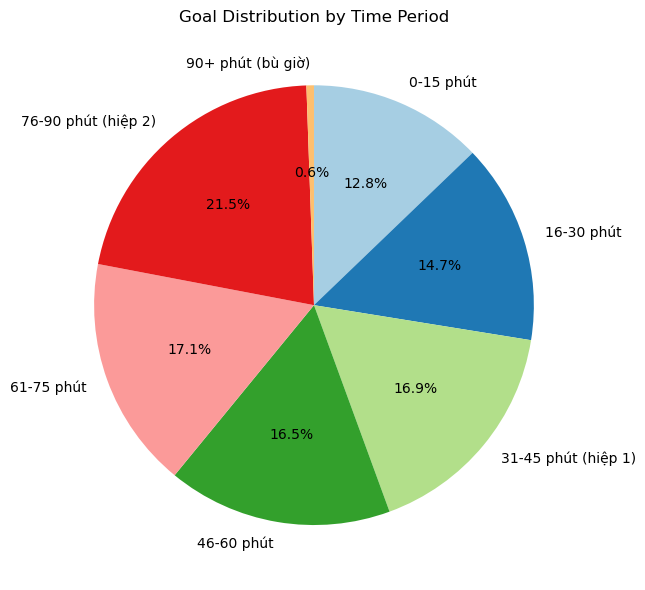

In [81]:
time_periods = time_goal_counts['time_period']
total_goals = time_goal_counts['total_goals']

# Tạo biểu đồ tròn
plt.figure(figsize=(8, 6))
colors = plt.cm.Paired(range(len(total_goals)))  # Tạo màu sắc
plt.pie(
    total_goals,
    labels=time_periods,
    autopct='%1.1f%%',  
    startangle=90,     
    counterclock=False,
    colors=colors
)
plt.title("Goal Distribution by Time Period")
plt.tight_layout()
plt.show()

Nhận xét biểu đồ trên:
- 76-90 phút (hiếp 2) chiếm nhiều nhất với 21.5%
- 90+ phút (bù giờ) chiếm ít nhất với 0.6%

Dùng biểu đồ để trực quan hóa time_goal_counts
- Vẽ biểu đồ thanh để trực quan hóa phân bố cụ thể của các bàn thắng trong các khoảng thời gian.

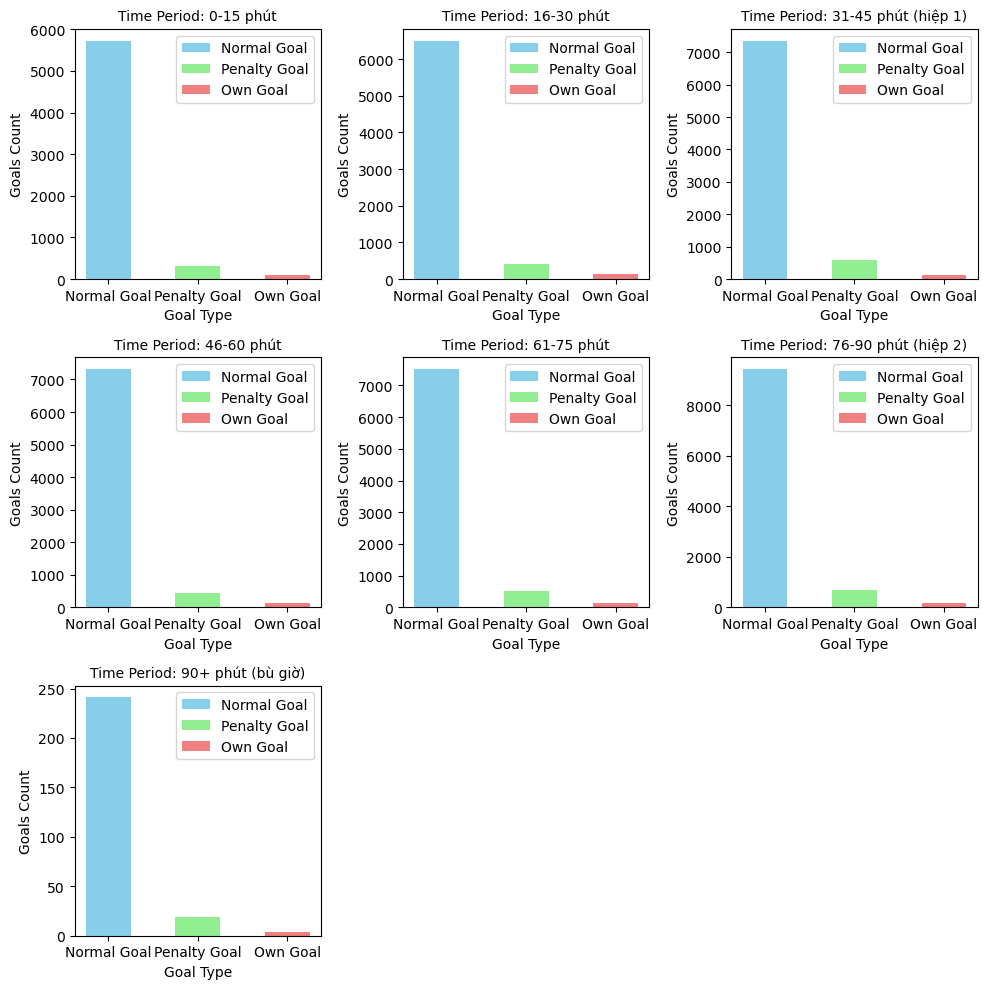

In [82]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

axes = axes.flatten()
time_period = time_goal_counts['time_period'].tolist()

# Màu sắc
colors = {
    'normal_goals': 'skyblue',
    'penalty_goals': 'lightgreen',
    'own_goals': 'lightcoral'
}

# Vẽ từng biểu đồ cho mỗi khoảng thời gian
for i, time_group in enumerate(time_period):

    group_data = time_goal_counts[time_goal_counts['time_period'] == time_group]
    
    axes[i].bar(['Normal Goal'], group_data['normal_goals'], label='Normal Goal', color=colors['normal_goals'], width=0.5)
    axes[i].bar(['Penalty Goal'], group_data['penalty_goals'], label='Penalty Goal', color=colors['penalty_goals'], width=0.5)
    axes[i].bar(['Own Goal'], group_data['own_goals'], label='Own Goal', color=colors['own_goals'], width=0.5)

    axes[i].set_title(f"Time Period: {time_group}", fontsize=10)
    axes[i].set_ylabel("Goals Count", fontsize=10)
    axes[i].set_xlabel("Goal Type", fontsize=10)
    

    axes[i].legend()

for i in range(len(time_period), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Nhận xét biểu đồ trên:
- Các bàn thắng bình thường chiếm đa số thậm chí áp đảo các bản thắng penalty và phản lưới nhà. Có thể là vì tỷ lệ phạm lỗi của các cầu thủ là không nhiều trong 1 trận đấu
- Hiệp 2 (76-90 phút) có số lượng bàn thắng tổng thể cao nhất (10,267 bàn). Điều này cho thấy các đội bóng có xu hướng ghi bàn nhiều hơn trong giai đoạn cuối của trận đấu, có thể do chiến thuật tấn công mạnh mẽ hơn khi gần đến thời gian kết thúc hoặc sự mệt mỏi dẫn đến nhiều cơ hội ghi bàn
- Hiệp 1 (31-45 phút) cũng là thời điểm có số lượng bàn thắng đáng kể (8,074 bàn), cho thấy các đội thường tìm cách ghi bàn trong hiệp đầu tiên của trận đấu khi cả hai đội còn tươi mới và không bị căng thẳng quá nhiều.
- Thời gian từ 0-15 phút cũng có một số bàn thắng (6,137 bàn), phản ánh sự tích cực ngay từ đầu trận đấu của các đội bóng.

#### Conclusion

Các huấn luyện viên có thể sử dụng thông tin này để điều chỉnh chiến thuật thi đấu, tập trung vào việc cải thiện khả năng ghi bàn trong hiệp 2, khi các đội đối thủ có thể mệt mỏi hơn và có nhiều cơ hội hơn.

Các đội bóng cần chú ý đến các tình huống phạt đền và tránh các lỗi dẫn đến phản lưới nhà, vì đây là những yếu tố có thể ảnh hưởng đến kết quả trận đấu.


---

**<font color='orange'>Câu hỏi 5:</font>** Tần suất các cầu thủ ghi bàn nhiều hơn một bàn trong một trận đấu (cú đúp, hat-trick) có thay đổi theo thời kỳ không?

**Ý nghĩa**: Việc ghi nhiều bàn thắng trong một trận đấu phản ánh năng lực cá nhân của cầu thủ và sự hỗ trợ từ đồng đội, cùng với mức độ phòng thủ của đối thủ. Do đó trả lời câu hỏi này sẽ giúp ta hiểu rõ hơn về sự thay đổi trong chiến thuật bóng đá qua thời gian.

**Các bước thực hiện**: 
1. Loại bỏ các trận đấu không có thông tin của các cầu thủ ghi bàn.
2. Loại bỏ các bàn thắng do cầu thủ phản lưới nhà.
3. Tạo DataFrame fre_player_sco_gt_1g (frequency player scores greater than 1 goal), gồm:
    - Cột `date`, `home_team`, `away_team`
    - Cột `double` thể hiện cho số cầu thủ ghi được 2 bàn trong trận đấu đó.
    - Cột `hat-trick+` thể hiện cho số cầu thủ ghi được 3 bàn trở lên trong trận đấu đó.
4. Tính tần suất tương ứng cho từng giai đoạn, lưu vào DataFrame period_fre_player_sco_gt_1g với 2 cột `period` và `frequency` đại diện cho số lần có cầu thủ ghi được trên 2 bàn trong mỗi trận đấu được tổ chức trong giai đoạn tương ứng.
5. Trực quan hóa.

#### Pre-processing

1. Loại bỏ các trận đấu không có thông tin của các cầu thủ ghi bàn:

In [83]:
df5 = df.copy()

In [84]:
# Loại bỏ các dòng có giá trị NaN tại cột `scorer`
df5 = df5.dropna(subset=['scorer'])

2. Loại bỏ các bàn thắng do cầu thủ phản lưới nhà:

In [85]:
# Loại bỏ các dòng có giá trị True tại cột `own_goal`
df5 = df5[df5['own_goal'] != True]

#### Analyzing to get the answer

3. Tạo DataFrame fre_player_sco_gt_1g (frequency player scores greater than 1 goal), gồm:
    - Cột `date`, `home_team`, `away_team`
    - Cột `double` thể hiện cho số cầu thủ ghi được 2 bàn trong trận đấu đó.
    - Cột `hat-trick+` thể hiện cho số cầu thủ ghi được 3 bàn trở lên trong trận đấu đó.

In [86]:
# Nhóm theo trận đấu và cầu thủ để đếm số bàn mỗi cầu thủ ghi trong mỗi trận
player_scores = df5.groupby(['date', 'home_team', 'away_team', 'scorer']).size().reset_index(name='goals_scored')

In [87]:
# Lọc các cầu thủ ghi từ 2 bàn trở lên trong mỗi trận
player_scores_gt_1 = player_scores[player_scores['goals_scored'] > 1]

In [88]:
# Tạo DataFrame tần suất
fre_player_sco_gt_1g = player_scores_gt_1.groupby(['date', 'home_team', 'away_team']).apply(
    lambda group: pd.Series({
        'gt_1_goal': (group['goals_scored'] >= 2).sum()
    })
).reset_index()

In [89]:
fre_player_sco_gt_1g.sample(10)

,date,home_team,away_team,gt_1_goal
4237,2023-10-13,Austria,Belgium,1
2503,2004-10-13,Netherlands,Finland,1
2745,2007-09-12,Andorra,Croatia,1
597,1967-04-08,Germany,Albania,2
801,1973-12-09,DR Congo,Morocco,1
714,1971-02-24,Netherlands,Luxembourg,2
4039,2021-09-01,Malta,Cyprus,1
2869,2008-06-22,Cape Verde,Mauritius,1
750,1972-06-18,Benin,Ghana,1
265,1953-12-17,France,Luxembourg,3


4. Tính tần suất tương ứng cho từng giai đoạn, lưu vào DataFrame period_fre_player_sco_gt_1g với 2 cột `period` và `frequency` đại diện cho số lần có cầu thủ ghi được trên 2 bàn trong mỗi trận đấu được tổ chức trong giai đoạn tương ứng.

In [90]:
period_fre_player_sco_gt_1g = pd.DataFrame({'period': list_str_periods, 'fre_sco_gt_1g': 0})
period_fre_player_sco_gt_1g

,period,fre_sco_gt_1g
0,1872-1888,0
1,1889-1905,0
2,1906-1922,0
3,1923-1939,0
4,1940-1956,0
5,1957-1973,0
6,1974-1990,0
7,1991-2007,0
8,2008-2024,0


In [91]:
# Tính tần suất cho từng giai đoạn
for idx, start_year in enumerate(periods):
    end_year = start_year + 16
    # Lọc các trận đấu thuộc giai đoạn
    period_data = fre_player_sco_gt_1g[(fre_player_sco_gt_1g['date'].dt.year >= start_year) & (fre_player_sco_gt_1g['date'].dt.year <= end_year)]
    # Tính tổng số lần có cầu thủ ghi được hơn 1 bàn
    period_fre_player_sco_gt_1g.loc[idx, 'fre_sco_gt_1g'] = period_data['gt_1_goal'].sum()


In [92]:
period_fre_player_sco_gt_1g

,period,fre_sco_gt_1g
0,1872-1888,0
1,1889-1905,0
2,1906-1922,21
3,1923-1939,206
4,1940-1956,226
5,1957-1973,632
6,1974-1990,624
7,1991-2007,1814
8,2008-2024,1749


5. Trực quan hóa.

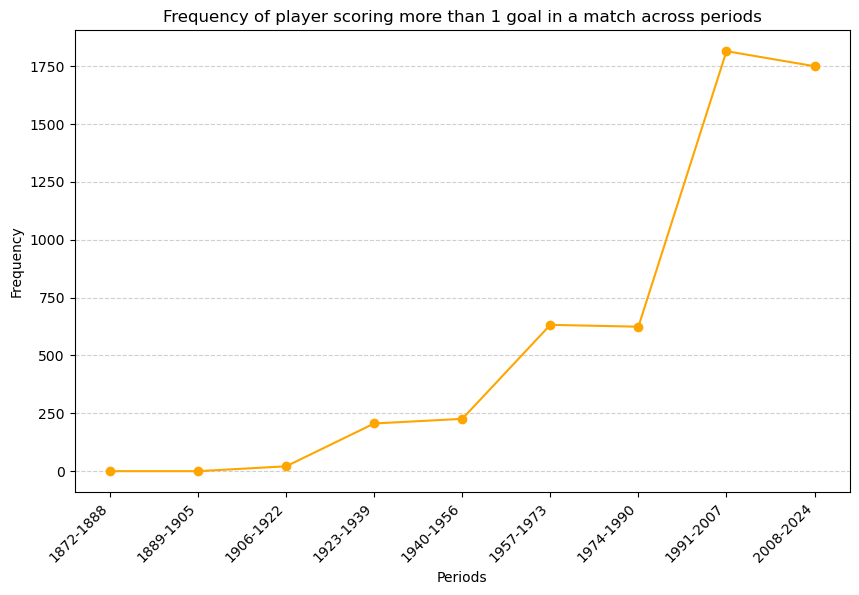

In [93]:
# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(period_fre_player_sco_gt_1g['period'], period_fre_player_sco_gt_1g['fre_sco_gt_1g'], marker='o', color='orange')
plt.title('Frequency of player scoring more than 1 goal in a match across periods')
plt.xlabel('Periods')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Conclusion

- Số lần cầu thủ ghi trên 1 bàn thắng trong 1 trận đấu tăng dần qua thời gian.
    - Trong giai đoạn đầu (1872–1922), tần suất cầu thủ ghi trên 1 bàn rất hiếm, có thể do chiến thuật thi đấu chưa hiện đại, số lượng trận đấu ít và quy mô bóng đá còn sơ khai.
    - Từ giai đoạn 1923–1939 trở đi, số lần xuất hiện cầu thủ ghi trên 1 bàn bắt đầu tăng rõ rệt, cho thấy sự phát triển của bóng đá về mặt kỹ thuật, chiến thuật, và số trận đấu nhiều hơn.
- Giai đoạn đỉnh cao (1991–2007):
    - Tần suất đạt đỉnh trong giai đoạn này với 1814 lần, cao hơn rất nhiều so với bất kỳ giai đoạn nào trước đó. Điều này phản ánh sự bùng nổ của các tài năng xuất sắc và chiến thuật tấn công hiện đại trong bóng đá lúc bấy giờ.
    - Các giải đấu quốc tế cũng diễn ra thường xuyên hơn, kéo theo nhiều cơ hội hơn cho các cầu thủ lập thành tích.  
    - Ngoài ra có thể là do chiến thuật tấn công lên ngôi, ít tập trung hơn cho khâu phòng ngự.
- Giảm nhẹ trong giai đoạn gần đây (2008–2024):
    - Mặc dù số lần xuất hiện cầu thủ ghi nhiều hơn 1 bàn trong 1 trận vẫn rất cao với 1749 lần nhưng có sự sụt giảm nhẹ so với giai đoạn trước đó. 
    - Điều này có thể là do chiến thuật phòng ngự được cải thiện hoặc sự cạnh tranh ngày càng khốc liệt khiến việc ghi nhiều bàn thắng trong một trận đấu trở nên khó khăn hơn đôi chút.
- **Nhận định:**
    - Ảnh hưởng của chiến thuật: Sự thay đổi trong chiến thuật thi đấu qua các thời kỳ đã tác động trực tiếp đến cơ hội lập cú đúp hoặc hat-trick của cầu thủ trong từng trận đấu.
    - Vai trò của cá nhân tài năng: Những cú đúp và hat-trick chủ yếu đến từ các siêu sao bóng đá, những người đã định hình lịch sử bóng đá trong từng giai đoạn.      

---

**<font color='orange'>Câu hỏi 6:</font>** Khoảng thời gian nào trong năm là thời gian sôi động nhất của bóng đá quốc tế?

**Ý nghĩa**: 
- Giúp cho những Fan hâm mộ bóng đá có thể lên kế hoạch theo dõi các trận đấu sôi động nhất.
- Giúp các nhà đầu tư/tài trợ để biết được thời điểm vàng để triển khai chiến lược quảng cáo.

**Các bước thực hiện**: 
- Trước hết ta tạo thêm các cột tháng năm để lưu trữ mốc thời gian trong năm
- Thống kê các trận đấu theo từng tháng
- Trực quan háo bằng biểu đồ

#### Pre-processing

Ta sẽ sử dụng cột datetime để tách tháng và năm

In [94]:
df6 = df.copy()
df6['month'] = df6['date'].dt.month
df6['year'] = df6['date'].dt.year
df6[['date', 'month', 'year']]

,date,month,year
0,1872-11-30,11,1872
1,1873-03-08,3,1873
2,1874-03-07,3,1874
3,1875-03-06,3,1875
4,1876-03-04,3,1876
...,...,...,...
77780,2024-11-19,11,2024
77781,2024-11-19,11,2024
77782,2024-11-19,11,2024
77783,2024-11-19,11,2024


#### Analyzing to get the answer

Đếm các trận đấu theo tháng

In [95]:
matches_per_month = df6.groupby('month').size().reset_index(name='match_count')
matches_per_month

,month,match_count
0,1,3726
1,2,3669
2,3,7852
3,4,4139
4,5,4858
5,6,13211
6,7,4994
7,8,3741
8,9,9358
9,10,10303


Dùng biểu đồ để trực quan các tháng

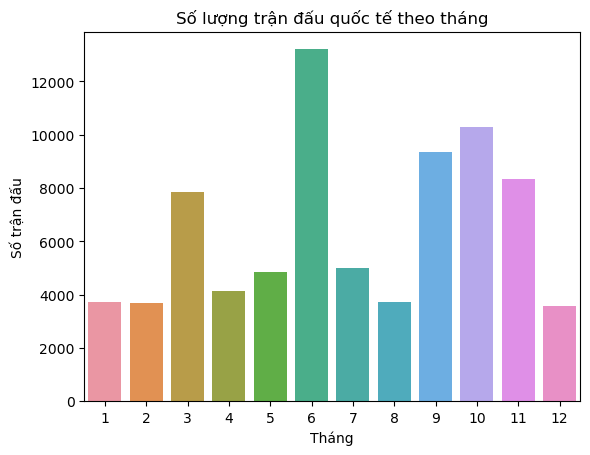

In [96]:
sns.barplot(x='month', y='match_count', data=matches_per_month)
plt.title('Số lượng trận đấu quốc tế theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số trận đấu')
plt.show()

Nhận xét biểu đồ trên:
- Tháng 6 có số lượng trận đấu cao nhất với hơn 12,000 trận. Đây thường là thời gian diễn ra các giải đấu lớn như World Cup, EURO, FIFA..vv
- Các tháng 1, 2, và 12 có số trận đấu thấp nhất, dưới 5,000 trận. Đây có thể là giai đoạn nghỉ giữa mùa của nhiều giải đấu bóng đá quốc tế.

---

## **<font color='orange'>Câu hỏi 7:</font>** Đâu sẽ là những đội tuyển thống trị bóng đá nam toàn cầu trong thời gian tới?

**Ý nghĩa**: Giúp được chuyên gia, nhà đầu tư, người hâm mộ hiểu được bối cảnh của bóng đá thế giới trong thời gian tới.

**Các bước thực hiện**:Muốn phân tích được dữ liêụ này ta cần chọn lọc dữ liệu để phân tích.

-  Về yếu tố chuyên môn: Chúng em nghĩ rằng việc so sánh các đội bóng ở các giải đấu lớn so với các khu vực nhỏ khá là khập khiển. Ví dụ những đội bóng không thể tham dự World Cup ở hiện tại thì không thể nào có thể trở thành các tuyển thống trị được.

- Về  yếu tố thời gian: Những thành tích hay những trận đấu cách đây đã quá lâu khó có thể phản ánh đúng thực lực hiện tại của đội bóng lúc này.

- Về tầng suất thi đấu: Số trận thi đấu quá ít cũng không thể đủ căn cứ để phân tích
 
=> Vì 3 lý do trên nên chúng em quyết định chỉ chọn dữ liệu để phân tích là những trận đấu trong thế kỷ 21, Thuộc khuôn khổ của 4 giải đấu lớn. FIFA World Cup, EUFA Uero, Copa America, Nation league và những đội muốn được xem xét thì phải thi đấu ít nhất 20 trận

- Tiếp đó chúng em sẽ đặt ra những tiêu chí và chọn những đội top 20 của tiêu chí đó để cho điểm, sau khi tính cho từng tiêu chí thì cộng tổng điểm lại. Kết quả sẽ là top những đội có điểm cao nhất. Những tiêu chí bao gồm

    + Số bàn thắng trung bình ghi được mỗi trận
    
    + Số bàn thua phải nhận mỗi trận

    + Tỷ lệ chiến thắng khi phải giải quyết trận đấu bằng loạt sút penalty
     
    + Tỷ lệ giữ sạch lưới trong trận đấu
- Cách tính điểm: top 1 mỗi tiêu chỉ sẽ được 20 điểm, top 2 được 19 điểm,...

### Bóc tách dữ liệu và tiền xử lý

In [97]:
mask  = (df['tournament'] == 'FIFA World Cup') | (df['tournament'] == 'UEFA Euro') | (df['tournament'] == 'Copa América') |(df['tournament'] == 'UEFA Nations League') 
df7  = df[mask]
# Bốc ra các cột cần thiết
df7 = df7[['date', 'home_team', 'away_team','home_score', 'away_score', 'winner_pen_shootout']]
# Loại bỏ duplicate
df7 = df7.drop_duplicates()
# Thêm 1 cột year
df7['year']  = df7['date'].dt.year
mask  = df7['year'] > 1999
df7  = df7[mask]
df7

,date,home_team,away_team,home_score,away_score,winner_pen_shootout,year
38030,2000-06-10,Belgium,Sweden,2,1,NaN,2000
38038,2000-06-11,France,Denmark,3,0,NaN,2000
38044,2000-06-11,Netherlands,Czech Republic,1,0,NaN,2000
38046,2000-06-11,Turkey,Italy,1,2,NaN,2000
38052,2000-06-12,Germany,Romania,1,1,NaN,2000
...,...,...,...,...,...,...,...
77753,2024-11-19,Wales,Iceland,4,1,NaN,2024
77754,2024-11-19,Montenegro,Turkey,3,1,NaN,2024
77755,2024-11-19,Slovakia,Estonia,1,0,NaN,2024
77756,2024-11-19,Sweden,Azerbaijan,6,0,NaN,2024


#### Analyzing to get the answer

##### Câu hỏi 7.1: Top 20 đội có số bàn thắng trung bình mỗi trận cao nhất?

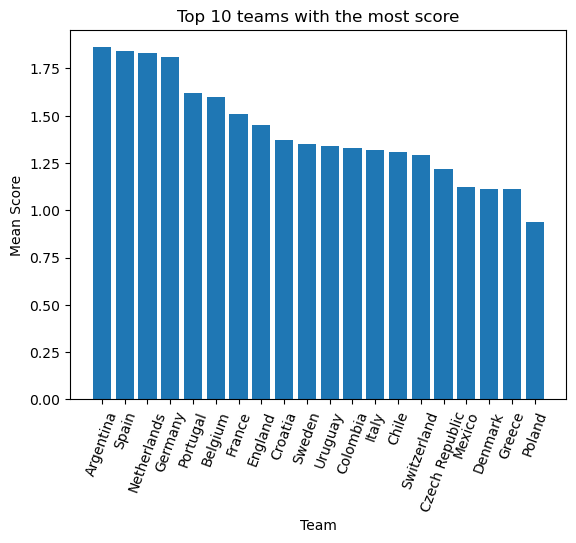

In [98]:
top_home_score = df7.groupby('home_team')['home_score'].agg(['mean', 'count'])
# Loại bỏ những đội có số trận ít hơn 20
top_home_score = top_home_score[top_home_score['count'] > 20]

top_away_score = df7.groupby('away_team')['away_score'].agg(['mean', 'count'])
# Loại bỏ những đội có số trận ít hơn 20
top_away_score = top_away_score[top_away_score['count'] > 20]

# Merge dữ liệu
top_score = pd.merge(top_home_score, top_away_score, left_index = True, right_index = True)
top_score['mean_all'] = ((top_score['mean_x'] * top_score['count_x'] + top_score['mean_y'] * top_score['count_y']) / (top_score['count_x'] + top_score['count_y'])).round(2)
top_20_1 = top_score.nlargest(n = 20,columns = 'mean_all')
top_20_1['points'] = range(20,0,-1)

# Vizualize
plt.bar(top_20_1.index, top_20_1['mean_all'])
plt.title('Top 10 teams with the most score')
plt.xlabel('Team')
plt.ylabel('Mean Score')
plt.xticks(rotation = 70)
plt.show()
top_20_1 = top_20_1['points']


#### Câu hỏi 7.2: Top 20 đội phải nhận bàn thua trung bình ít nhất?

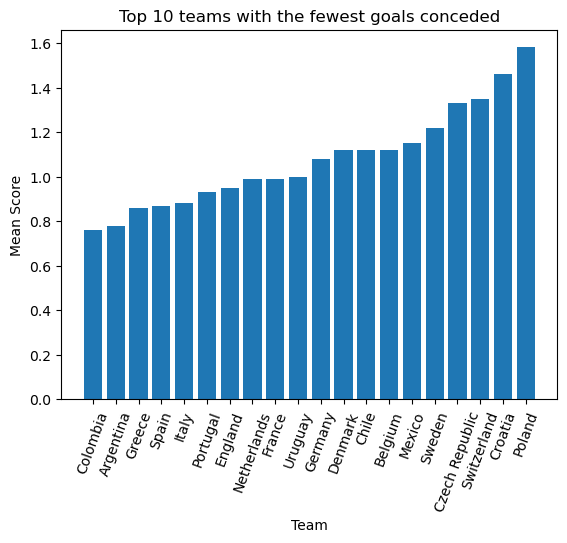

In [99]:

top_home_score = df7.groupby('home_team')['away_score'].agg(['mean', 'count'])
# Loại bỏ những đội có số trận ít hơn 20
top_home_score = top_home_score[top_home_score['count'] > 20]

top_away_score = df7.groupby('away_team')['home_score'].agg(['mean', 'count'])
# Loại bỏ những đội có số trận ít hơn 20
top_away_score = top_away_score[top_away_score['count'] > 20]

# Merge dữ liệu
top_score = pd.merge(top_home_score, top_away_score, left_index = True, right_index = True)
top_score['mean_all'] = ((top_score['mean_x'] * top_score['count_x'] + top_score['mean_y'] * top_score['count_y']) / (top_score['count_x'] + top_score['count_y'])).round(2)
top_20_2 = top_score.nsmallest(n = 20,columns = 'mean_all')
top_20_2['points'] = range(20,0,-1)

# Vizualize
plt.bar(top_20_2.index, top_20_2['mean_all'])
plt.title('Top 10 teams with the fewest goals conceded')
plt.xlabel('Team')
plt.ylabel('Mean Score')
plt.xticks(rotation = 70)
plt.show()
top_20_2 = top_20_2['points']


#### Câu hỏi 7.3: Tỷ lệ chiến thắng của các đội tuyển khi trận đấu cần phải giải quyết bằng loạt sút penalty như thế nào?

    Chúng em chọn câu hỏi này vì ở nhũng giải đấu cao nhất ở cấp độ đội tuyển quốc gia, những trận đấu sẽ có tỷ lệ cao sẽ giải quyết bằng những loại luân lưu. Vậy nên có tỷ lệ thắng luân lưu cao cũng là yếu tố không thể thiếu. 

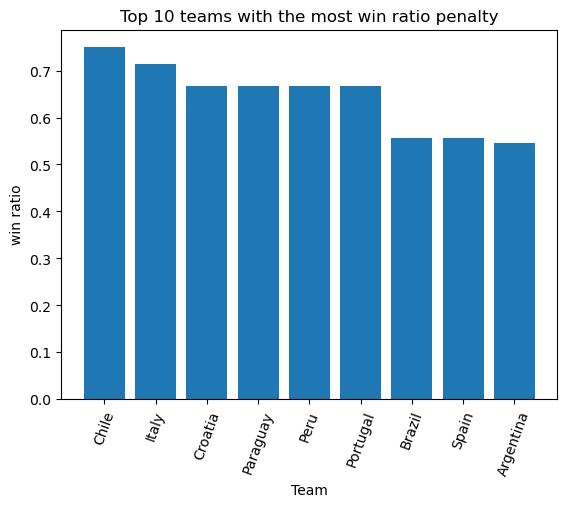

In [100]:
# Chọn ra những trận có penalty 
# Chỉ tính những đội đá từ 3 trận trận trở lên và có tỷ lệ thắng trên 50%
data_shootout = df7[df7['winner_pen_shootout'].notna()]
home_win = data_shootout[data_shootout['home_team'] == data_shootout['winner_pen_shootout']].groupby('home_team').size()
away_win = data_shootout[data_shootout['away_team'] == data_shootout['winner_pen_shootout']].groupby('away_team').size()
amount_match_home = data_shootout.groupby('home_team').size()
amount_match_away = data_shootout.groupby('away_team').size()


all_win = pd.concat([home_win, away_win, amount_match_home, amount_match_away], axis=1)

all_win.columns = ['amount_of_win_home', 'amount_of_win_away', 'total_home', 'total_away']
all_win['total'] = all_win['total_home'].fillna(0) + all_win['total_away'].fillna(0)
all_win= all_win[all_win['total']>2]
all_win['ratio'] = ((all_win['amount_of_win_home'] + all_win['amount_of_win_away']) / (all_win['total_away'] + all_win['total_home']))
all_win= all_win[all_win['ratio']>0.5]

top_10_3  = all_win.nlargest(n= 10, columns = 'ratio')

top_10_3['points'] = range(top_10_3.shape[0], 0, -1)

# Vizualize 
plt.bar(top_10_3.index, top_10_3['ratio'])
plt.title('Top 10 teams with the most win ratio penalty')
plt.xlabel('Team')
plt.ylabel('win ratio')
plt.xticks(rotation = 70)
plt.show()
top_10_3= top_10_3['points']

#### Câu hỏi 7.4: Những đội nào có tỷ lệ giữ sạch lưới cao nhất?

                 home_0  away_0  amount_match_home  amount_match_away  \
Colombia           21.0    12.0                 32                 23   
Belarus             8.0     4.0                 12                 12   
Argentina          26.0    12.0                 57                 21   
Norway              8.0     5.0                 13                 14   
Greece             11.0    10.0                 22                 22   
Azerbaijan          7.0     4.0                 12                 12   
Kosovo              5.0     6.0                 12                 12   
Moldova             5.0     6.0                 12                 12   
Brazil             30.0     5.0                 62                 16   
England            19.0    17.0                 43                 39   
Spain              22.0    17.0                 46                 43   
Georgia             7.0     5.0                 14                 14   
Portugal           21.0    15.0                 45 

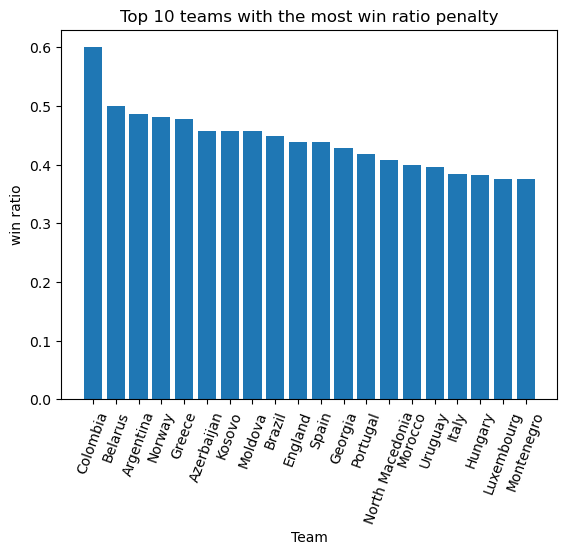

In [101]:
home_0 = df7[df7['away_score'] == 0].groupby('home_team').size()
away_0 = df7[df7['home_score'] == 0].groupby('away_team').size() 

amount_match_home = df7.groupby('home_team').size()
amount_match_away = df7.groupby('away_team').size()

merged_data = pd.concat([home_0, away_0, amount_match_home, amount_match_away], axis = 1)   
merged_data.columns = ['home_0', 'away_0', 'amount_match_home', 'amount_match_away']
merged_data['ratio'] = ( merged_data['home_0'] + merged_data['away_0']) / (merged_data['amount_match_home'] + merged_data['amount_match_away'])
top_20_4 = merged_data.nlargest(n = 20, columns = 'ratio')
top_20_4['points'] = range(20,0,-1)
print(top_20_4)

plt.bar(top_20_4.index, top_20_4['ratio'])
plt.title('Top 10 teams with the most win ratio penalty')
plt.xlabel('Team')
plt.ylabel('win ratio')
plt.xticks(rotation = 70)
plt.show()
top_20_4= top_20_4['points']

      Cuối cùng chỉ cần cộng tính tổng điểm của các đội và chọn ra các đội có điểm số cao nhất

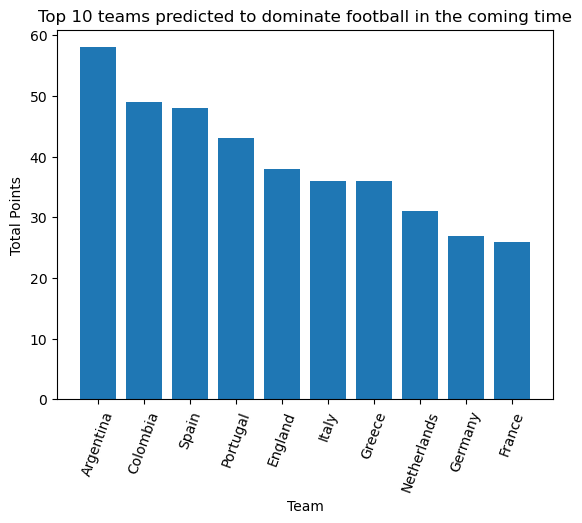

In [102]:
all_points = pd.concat([top_20_1, top_20_2, top_10_3, top_20_4], axis = 1)
all_points.columns = ['criteria1', 'criteria2', 'criteria3', 'criteria4']

all_points['total_points'] = all_points[['criteria1', 'criteria2', 'criteria3', 'criteria4']].fillna(0).sum(axis = 1)
top_10_points = all_points.nlargest(n = 10, columns = 'total_points')

# Vizualize
plt.bar(top_10_points.index, top_10_points['total_points'])
plt.title('Top 10 teams predicted to dominate football in the coming time')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.xticks(rotation = 70)
plt.show()

#### Your conclusion

Theo như phân tích trên, chúng em đưa ra được sự dự đoán rằng:

 - Nhà vô đương kim vô địch FIFA World Cup là Argentina cùng với nhà vô Đich UEFA Euro là Spain sẽ tiếp tục nằm trên đỉnh của thế giới.
 
 - Cùng với 2 nhà vô địch thì bóng đá Comlombia (á quân Copa American) cũng đang phát triển nhanh chóng, tiền đạo chủ chốt của họ là Luiz Dias đang chạm đỉnh phong độ tại Liverpool.

 - Phần còn lại chắc chắn không thể nào bỏ qua các đội bóng có truyền thống lâu đời và có nền bóng đá hàng đầu châu Âu như: Portugal, England, Italy, Germany, France,...

---

## Reflection

### Each member:

1. **Trương Tiến Anh - 22120017:**

- What difficulties have you encountered?

Khó khăn trong việc xử lý dữ liệu hợp lệ trước khi trả lời câu hỏi, vì file có nhiều giá trị bị trống. Chọn biểu đồ phù hợp để trực quan dữ liệu tốt nhất

- What have you learned?

Học thêm nhiều cách xử lý dữ liệu, lệnh mới, trực quan hóa biểu đồ và cách làm việc nhóm trên Github

2. **Lê Nguyễn Gia Bảo - 22120023:**

- What difficulties have you encountered?

Khó khắn lớn nhất của em là việc đặt câu hỏi. Từ trước đến giờ em luôn nghĩ việc đặt câu hỏi rất đơn giản thế nhưng việc đặt câu hỏi thỏa mãn 2 tiêu chí "đủ" và "đúng" thật sự rất khó.

Đặt câu hỏi làm sao để khai thác được bộ dữ liệu một cách triệt và sau khi trả lời câu hỏi đó sẽ mang lại những thông tin chi tiết có ý nghĩa cần phải dành nhiều thời gian và sự tập trung.

- What have you learned?

Em đã rèn luyện được nhiều kỹ năng trong quy trình khoa học dữ liệu, tất cả đều đã được chúng em trình bày trong notebook này.

Bên cạnh đó em cũng đã cải thiện hơn các kỹ năng mềm, đặc biệt là làm việc nhóm. Việc thống nhất bộ dữ liệu, bộ câu hỏi đào hỏi các thành viên dành sự tập trung suy nghĩ ý tưởng cá nhân song song với các buổi làm việc nhóm để thống nhất nội dung. Thông qua đó em học được thêm về sự chủ động.

Ngoài ra, em được tiếp xúc và thực hành nhiều hơn với Git-Github - công cụ version control rất cần thiết và hữu dụng.

3. **Đoàn Minh Cường - 22120043:**

- What difficulties have you encountered?

Khó khăn đầu tiên: em gặp phải đó là dữ liệu có quá ít kiểu Numerical, làm cho việc phân tích và tìm insight khá khó khăn.

Khó khăn thứ hai: Đây là lần đầu tiên em dùng github để làm việc nhóm, việc xử lý conflict cũng như merge code làm mất rất nhiều thời gian.

- What have you learned?

Qua đồ án này em đã nghĩ mình học được rất nhiều thứ, đặc biệt là làm việc nhóm bằng Github.

Hơn nữa, em còn học được cách hoàn thành một quy trình khoa học dữ liệu với tập dữ liệu chứa rất nhiều Catelogical.

### Our group:

- If we had more time, what would we do?

Học thêm về Machine Learning để ứng dụng vào các câu hỏi mang tính dự đoán.

Nhóm em sẽ tìm hiểu và áp dụng phương pháp Học máy (Machine Learning) để trả lời câu hỏi số 7: "Đâu sẽ là những đội tuyển thống trị bóng đá nam toàn cầu trong thời gian tới?".

Hiện tại, nhóm em chỉ dựa vào bộ dữ liệu sẵn có, đặt ra các tiêu chí để tính điểm và dự đoán. Tuy nhiên, cách làm này mang tính chủ quan và có thể chưa khai thác hết tiềm năng của dữ liệu. Việc áp dụng Học máy sẽ giúp nhóm xây dựng một mô hình dự đoán khách quan, chính xác hơn dựa trên các mẫu và xu hướng trong dữ liệu.

---

## References

- Các Homeworks + Labs + Demos + Slides của lớp `Lập trình cho Khoa học dữ liệu - CQ2022/21`.
- Các Homeworks + Slides của lớp `Nhập môn khoa học dữ liệu - CQ2022/21`.
- Thông tin về bàn thắng của các cầu thủ trên [Wikipedia](https://vi.wikipedia.org/).